<a href="https://colab.research.google.com/github/Michaelzats/Python_portfolio_analytics_prediction_/blob/main/Python_portfolio_analytics_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
# !pip install --upgrade mplfinance
# !pip install statsmodels --upgrade
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader



  Using cached https://github.com/matplotlib/mpl_finance/archive/master.zip


In [ ]:
#1 

In [ ]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

In [ ]:
# Function that gets a dataframe by providing a ticker and starting date
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    
    # Defines the time periods to use
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    
    # Reads data into a dataframe
    df = web.DataReader(ticker, 'yahoo', start, end)
    
    # Save data to a CSV file
    # For Windows
    # df.to_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
    # For MacOS
    df.to_csv("/Users/mihailzac/Desktop/Python/Projects/Python for finance/" + ticker + '.csv')
    return df


In [ ]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):
    
    # Try to get the file and if it doesn't exist issue a warning
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
        # For MacOS
        df = pd.read_csv("/Users/mihailzac/Desktop/Python/Projects/Python for finance/" + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df


In [ ]:
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price OR (EP / BP) - 1

# Shift provides the value from the previous day
# NaN is displayed because there was no previous day price for the 1st calculation
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    # Save data to a CSV file
    # For Windows
    # df.to_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
    # For MacOS
    df.to_csv("/Users/mihailzac/Desktop/Python/Projects/Python for finance/" + ticker + '.csv')
    return df  


In [ ]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Use a mask to grab data between defined dates
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    
    # Get the mean of the column named daily return
    daily_ret = df.loc[mask]['daily_return'].mean()
    
    # Get the number of days between 2 dates
    df2 = df.loc[mask]
    days = df2.shape[0]

    # Return the total return between 2 dates
    return (days * daily_ret)

In [ ]:
# Receives a ticker and the date range for which to plot
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv',index_col=0,parse_dates=True)
        # For MacOS
        df = pd.read_csv('/Users/mihailzac/Desktop/Python/Projects/Python for finance/' + ticker + '.csv',index_col=0,parse_dates=True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df_sub,type='candle')

        # Plot price changes
        mpf.plot(df_sub,type='line')

        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df_sub,type='ohlc',mav=4)
        
        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(12, 8), style=s) 
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1) 
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)  

        # You can plot multiple MAVs, volume, non-trading days
        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)


In [ ]:
# Creates a simple price / date plot between dates
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
        # For MacOS
        df = pd.read_csv("/Users/mihailzac/Desktop/Python/Projects/Python for finance/" + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # Convert to Numpy array
        df_np = df_sub.to_numpy()
        
        # Get adjusted close data from the 5th column
        np_adj_close = df_np[:,5]
        
        # Get date from the 1st
        date_arr = df_np[:,1]
        
        # Defines area taken up by the plot
        fig = plt.figure(figsize=(12,8),dpi=100)
        axes = fig.add_axes([0,0,1,1])
        
        # Define the plot line color as navy
        axes.plot(date_arr, np_adj_close, color='navy')
        
        # Set max ticks on the x axis
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        
        # Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        
        # Set grid background color
        axes.set_facecolor('#FAEBD7')


In [ ]:
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)


In [ ]:
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    for x in tickers:
        mult_df[x] = web.DataReader(x, 'yahoo', start, end)[col_name]
        
    return mult_df


In [ ]:
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (15,6))


In [ ]:
# Receives the dataframe with the Adj Close data along with the stock ticker
# Returns the mean and standard deviation associated with the ticker
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()


In [ ]:
# Receives the dataframe with the stock ticker as the column name and
# the Adj Close values as the column data and returns the mean and 
# standard deviation
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))


Total Return : 0.6166401575831238
Stock: FB   Mean:  234.55 Standard deviation: 38.57
Coefficient of Variation: 0.1644238149761194

Stock: AMZN Mean: 2680.86 Standard deviation: 545.76
Coefficient of Variation: 0.2035772257081551

Stock: AAPL Mean:   94.20 Standard deviation: 21.76
Coefficient of Variation: 0.2309901477965234

Stock: NFLX Mean:  446.83 Standard deviation: 65.61
Coefficient of Variation: 0.14684116488739776

Stock: GOOG Mean: 1481.40 Standard deviation: 175.97
Coefficient of Variation: 0.11878452933446865



,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2020-01-02,209.779999,1898.010010,73.785912,329.809998,1367.369995
2020-01-03,208.669998,1874.969971,73.068558,325.899994,1360.660034
2020-01-06,212.600006,1902.880005,73.650795,335.829987,1394.209961
2020-01-07,213.059998,1906.859985,73.304413,330.750000,1393.339966
2020-01-08,215.220001,1891.969971,74.483597,339.260010,1404.319946
...,...,...,...,...,...
2020-12-24,267.399994,3172.689941,130.802338,513.969971,1738.849976
2020-12-28,277.000000,3283.959961,135.480591,519.119995,1776.089966
2020-12-29,276.779999,3322.000000,133.676666,530.869995,1758.719971


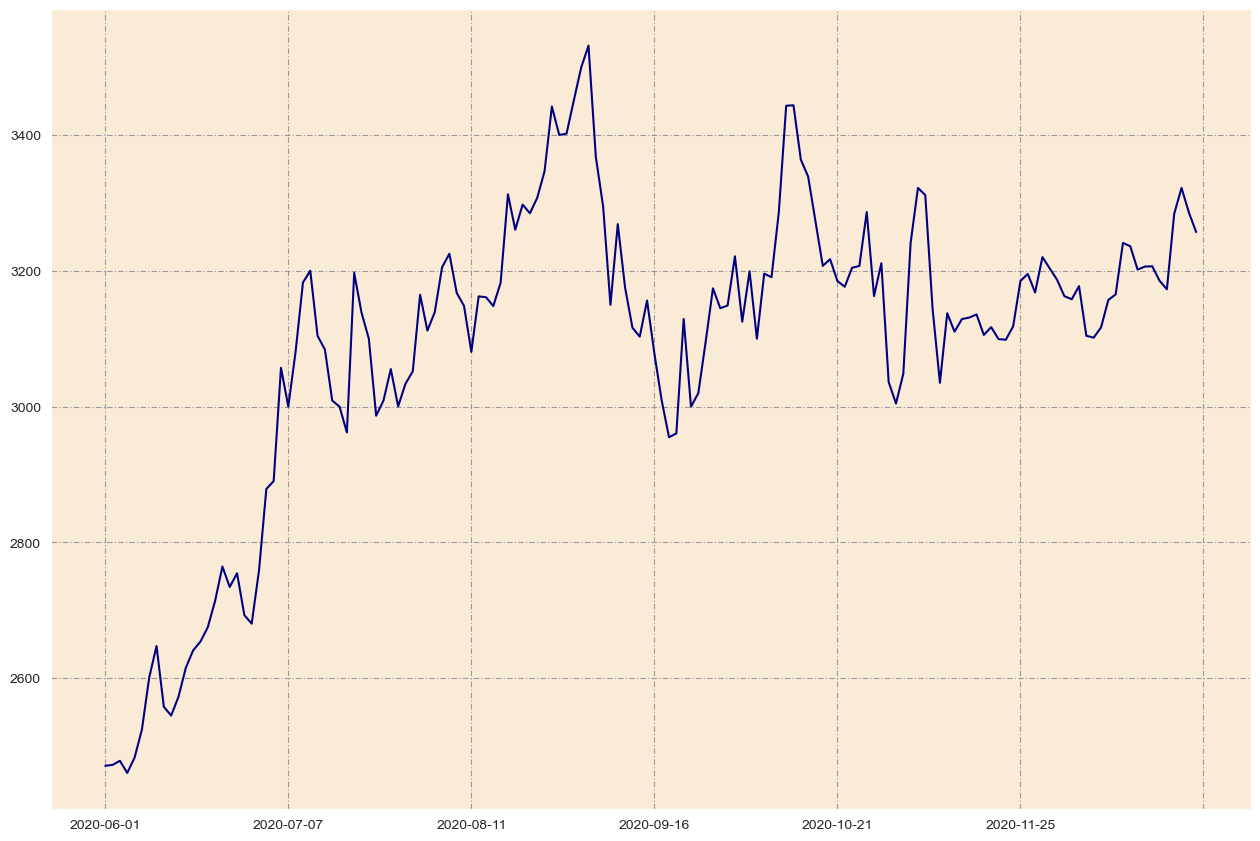

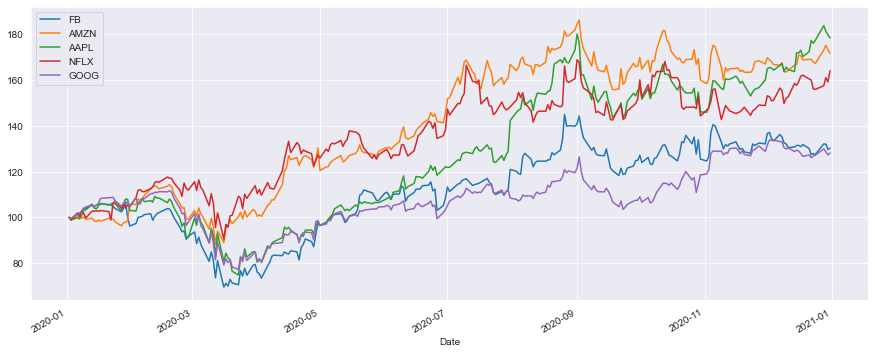

In [ ]:
# Call to read the data from Yahoo into a CSV and then retrieve a Dataframe
AMZN = save_to_csv_from_yahoo('AMZN', 2020, 1, 1, 2021, 1, 1)

# Retrieve data from the CSV file
AMZN = get_df_from_csv('AMZN')

# Add daily return to function
add_daily_return_to_df(AMZN, 'AMZN')

# Get total return between dates
tot_ret = get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)
print("Total Return :", tot_ret)

# Use Matplotlib finance to print multiple charts
# mplfinance_plot('AMZN', 'ohlc', 2020, 6, 1, 2021, 1, 1)

price_plot('AMZN', 2020, 6, 1, 2021, 1, 1)

# Download multiple stocks
tickers = ["FB", "AAPL", "NFLX", "GOOG"]
# download_multiple_stocks(2020, 1, 1, 2021, 1, 1, *tickers)

# Merge dataframes from multiple stocks using the same column name
tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
mult_df = merge_df_by_column_name('Adj Close',  2020, 1, 1, 2021, 1, 1, *tickers)
mult_df.tail()

# Pass Investment Amount and Plot Returns using Multiple Stocks
plot_return_mult_stocks(100, mult_df)

# Pass multiple stocks with their adjusted close values to receive their
# different means and standard deviations
get_mult_stock_mean_sd(mult_df)
mult_df

# It is hard to compare stocks by standard deviation when their stock prices
# are so different. The coefficient of variation is the ratio between the 
# standard deviation and the mean and it provides a comparable standard deviation
# We get it by dividing the standard deviation by the mean cov = std / mean
# We see here that GOOG has the least amount of variability


In [ ]:
#2.1 

In [ ]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

In [ ]:
stocks_not_downloaded = []
missing_stocks = []

In [ ]:
# Function that gets a dataframe by providing a ticker and starting date
def save_to_csv_from_yahoo(folder, ticker, syear, smonth, sday, eyear, emonth, eday):
    # Defines the time periods to use
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    
    try:
        print("Get Data for : ", ticker)
        # Reads data into a dataframe
        df = web.DataReader(ticker, 'yahoo', start, end)['Adj Close']
    
        # Wait 10 seconds
        time.sleep(10)
    
        # Save data to a CSV file
        df.to_csv(folder + ticker + '.csv')
    except Exception as ex:
        stocks_not_downloaded.append(ticker)
        print("Couldn't Get Data for :", ticker)

In [ ]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_stock_df_from_csv(folder, ticker):
    
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(folder + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

In [ ]:
def get_column_from_csv(file, col_name):
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(file)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df[col_name]

In [ ]:
tickers = get_column_from_csv("/Users/mihailzac/Desktop/Python/Projects/Python for finance/Wilshire-5000-Stocks-New.csv", "Ticker")
tickers

# for x in tickers:
#     print(x, end=", ")

0          A
1         AA
2        AAL
3       AAME
4        AAN
        ... 
3476    ZUMZ
3477     ZUO
3478    ZYNE
3479    ZYXI
3480    ZNGA
Name: Ticker, Length: 3481, dtype: object

In [ ]:
# # # Folder used to store stock data
# folder = "/Users/mihailzac/Desktop/Python/Projects/Python for finance/Stock_list/"

# for x in range(3480):
#   save_to_csv_from_yahoo(folder, tickers[x], 2020, 1, 1, 2022, 5, 7)
# print("Finished")

In [ ]:
#2.2 

In [ ]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

In [ ]:
# Define path to files
path = "/Users/mihailzac/Desktop/Python/Projects/Python for finance/Stock_list/"

# Start date defaults
S_YEAR = 2020
S_MONTH = 1
S_DAY = 1
S_DATE_STR = f"{S_YEAR}-{S_MONTH}-{S_DAY}"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2022
E_MONTH = 5
E_DAY = 7
E_DATE_STR = f"{E_YEAR}-{E_MONTH}-{E_DAY}"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)


In [ ]:
# listdir returns all files in the directory and isfile will return true
# if it is a file and then we store its name in our list named files
files = [x for x in listdir(path) if isfile(join(path, x))]

# Remove extension from file names
# Splitext splits the file name into 2 parts being the name and extension
# We say get all file names and then store just the name in our list named files
tickers = [os.path.splitext(x)[0] for x in files]
tickers

['CSCO',
 'PRI',
 'HLNE',
 'HUBS',
 'SBGI',
 'UFCS',
 'GFED',
 'AIRT',
 'SITC',
 'RHE',
 'ISSC',
 'TRNS',
 'AEIS',
 'UAL',
 'TROW',
 'ISRG',
 'EGP',
 'EFC',
 'EEX',
 'NVR',
 'PLYM',
 'FEIM',
 'WOR',
 'PRGO',
 'LECO',
 'RPT',
 'VCYT',
 'COHN',
 'PLOW',
 'UVE',
 'ORRF',
 'OESX',
 'SIBN',
 'NOG',
 'BXC',
 'CHCO',
 'LBTYK',
 'SPOK',
 'TPR',
 'DVN',
 'MGEE',
 'AMSC',
 'SVT',
 'SCYX',
 'MN',
 'LOVE',
 'ASYS',
 'INSE',
 'HAFC',
 'CR',
 'ADTN',
 'JVA',
 'JNCE',
 'OFLX',
 'DRRX',
 'BV',
 'AM',
 'W',
 'CE',
 'ASTC',
 'MRO',
 'HOV',
 'NBIX',
 'EVTC',
 'VYGR',
 'BA',
 'VRTX',
 'AFG',
 'GILD',
 'WW',
 'MDB',
 'MGY',
 'EVBN',
 'SLM',
 'NLSN',
 'AMKR',
 'VPG',
 'THC',
 'FCFS',
 'VRAY',
 'LOOP',
 'TAYD',
 'MDU',
 'XELA',
 'TDW',
 'WSTG',
 'CEI',
 'CFR',
 'PFMT',
 'DCO',
 'TVTY',
 'EQIX',
 'ZG',
 'HVT',
 'MKL',
 'QUIK',
 'HUN',
 'MBOT',
 'TER',
 'CULP',
 'SMBK',
 'JOB',
 'GPMT',
 'PODD',
 'MDT',
 'ARC',
 'ATGE',
 'IPAR',
 'DLA',
 'STAR',
 'SND',
 'AXSM',
 'BOOT',
 'MDC',
 'AMSWA',
 'FORM',
 'CPIX',
 'F

In [ ]:
stock_df = pd.DataFrame(tickers,columns=['Ticker'])
stock_df


,Ticker
0,CSCO
1,PRI
2,HLNE
3,HUBS
4,SBGI
...,...
2906,PPL
2907,OBCI
2908,ROKU
2909,MTDR


In [ ]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):
    
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(path + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df


In [ ]:
def save_dataframe_to_csv(df, ticker):
    df.to_csv(path + ticker + '.csv')

In [ ]:
def delete_unnamed_cols(df):
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    return df

In [ ]:
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price OR (EP / BP) - 1

# Shift provides the value from the previous day
# NaN is displayed because there was no previous day price for the 1st calculation
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    # Save data to a CSV file
    df.to_csv(path + ticker + '.csv')
    return df  

In [ ]:
# Return on Investment is the return you received from your investment
# This amount does not include your initial investment
# If you invest 100 and have 200 after 5 years
# ROI = End Value (200) - Initial Value (100) / Inital Value = 1
# Your new total is Inital Investment + 1 * Inital Investment = 200

def get_roi_defined_time(df):
    # Set as a datetime
    df['Date'] = pd.to_datetime(df['Date'])
    start_val = df[df['Date'] == S_DATE_STR]['Adj Close'][0]
    print("Initial Price :", start_val)
    
    # ----- I CHANGED THIS AFTER THE VIDEO -----
    
    end_val = df[df['Date'] == E_DATE_STR]['Adj Close']
    print(end_val.item())
    print("Final Price :", end_val.item())
    
    # ----- END OF VIDEO CHANGES -----
    
    # Calculate return on investment
    roi = (end_val - start_val) / start_val

    # Return the total return between 2 dates
    return roi


In [ ]:
# Receives the dataframe with the Adj Close data and returns the coefficient of variation
def get_cov(stock_df):
    mean = stock_df['Adj Close'].mean()
    sd = stock_df['Adj Close'].std()
    cov = sd / mean
    return cov


In [ ]:
# Create a backup for all original stock data

# Get our 1st ticker
tickers[0]

# Get a dataframe for that ticker
stock_a = get_df_from_csv(tickers[0])
stock_a

# Add daily return to this dataframe
add_daily_return_to_df(stock_a, tickers[0])
stock_a

# Delete unnamed columns in dataframe
stock_a = delete_unnamed_cols(stock_a)
stock_a

# Save cleaned dataframe to csv
save_dataframe_to_csv(stock_a, tickers[0])


In [ ]:
# Create a backup for all original stock data

# Cycle through all tickers

for ticker in tickers:
    try:
        print("Working on :", ticker)

        # Get a dataframe for that ticker
        stock_df = get_df_from_csv(ticker)

        # Add daily return to this dataframe
        add_daily_return_to_df(stock_df, ticker)

        # Delete unnamed columns in dataframe
        stock_df = delete_unnamed_cols(stock_df)

        # Save cleaned dataframe to csv
        save_dataframe_to_csv(stock_df, ticker)
    except:
        continue


Working on : CSCO
Working on : PRI
Working on : HLNE
Working on : HUBS
Working on : SBGI
Working on : UFCS
Working on : GFED
Working on : AIRT
Working on : SITC
Working on : RHE
Working on : ISSC
Working on : TRNS
Working on : AEIS
Working on : UAL
Working on : TROW
Working on : ISRG
Working on : EGP
Working on : EFC
Working on : EEX
Working on : NVR
Working on : PLYM
Working on : FEIM
Working on : WOR
Working on : PRGO
Working on : LECO
Working on : RPT
Working on : VCYT
Working on : COHN
Working on : PLOW
Working on : UVE
Working on : ORRF
Working on : OESX
Working on : SIBN
Working on : NOG
Working on : BXC
Working on : CHCO
Working on : LBTYK
Working on : SPOK
Working on : TPR
Working on : DVN
Working on : MGEE
Working on : AMSC
Working on : SVT
Working on : SCYX
Working on : MN
Working on : LOVE
Working on : ASYS
Working on : INSE
Working on : HAFC
Working on : CR
Working on : ADTN
Working on : JVA
Working on : JNCE
Working on : OFLX
Working on : DRRX
Working on : BV
Working on : 

In [ ]:
stock_a

# Get total return since 2017
# Final Price 167.67 = (44.77 * 2.745) + 44.77
get_roi_defined_time(stock_a)

# Get coefficient of variation 
# This is higher than normal because I'm using many years instead of one
# get_cov(stock_a)

KeyError: 0

In [ ]:
#3

In [ ]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

In [ ]:


# Define path to files
# For MacOS
# PATH = "/Users/derekbanas/Documents/Tutorials/Python for Finance/Stocks/"
# For Windows
PATH = "/Users/mihailzac/Desktop/Python/Projects/Python for finance/Stock_list/"
# Start date defaults
S_YEAR = 2020
S_MONTH = 1
S_DAY = 1
S_DATE_STR = "2020-01-01"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2022
E_MONTH = 5
E_DAY = 7
E_DATE_STR = "2021-05-07"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)


In [ ]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
tickers.remove('.DS_Store')
tickers.sort()
tickers

['A',
 'AA',
 'AAL',
 'AAME',
 'AAN',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AAWW',
 'ABBV',
 'ABC',
 'ABCB',
 'ABEO',
 'ABG',
 'ABIO',
 'ABM',
 'ABMD',
 'ABR',
 'ABT',
 'ABTX',
 'AC',
 'ACA',
 'ACAD',
 'ACBI',
 'ACC',
 'ACCO',
 'ACER',
 'ACGL',
 'ACHC',
 'ACHV',
 'ACIW',
 'ACLS',
 'ACM',
 'ACMR',
 'ACN',
 'ACNB',
 'ACOR',
 'ACRE',
 'ACRS',
 'ACRX',
 'ACTG',
 'ACU',
 'ADBE',
 'ADC',
 'ADES',
 'ADI',
 'ADM',
 'ADMA',
 'ADMP',
 'ADNT',
 'ADP',
 'ADSK',
 'ADT',
 'ADTN',
 'ADUS',
 'ADVM',
 'ADXS',
 'AE',
 'AEE',
 'AEHR',
 'AEIS',
 'AEL',
 'AEMD',
 'AEO',
 'AEP',
 'AERI',
 'AES',
 'AEY',
 'AFG',
 'AFI',
 'AFL',
 'AGCO',
 'AGE',
 'AGEN',
 'AGFS',
 'AGIO',
 'AGLE',
 'AGM',
 'AGNC',
 'AGO',
 'AGR',
 'AGRX',
 'AGS',
 'AGTC',
 'AGX',
 'AGYS',
 'AHH',
 'AHT',
 'AIG',
 'AIMC',
 'AIN',
 'AINC',
 'AIR',
 'AIRG',
 'AIRI',
 'AIRT',
 'AIT',
 'AIV',
 'AIZ',
 'AJG',
 'AJRD',
 'AJX',
 'AKAM',
 'AKBA',
 'AKR',
 'AKTS',
 'AL',
 'ALB',
 'ALBO',
 'ALCO',
 'ALDX',
 'ALE',
 'ALEC',
 'ALEX',
 'ALG',
 'ALGN

In [ ]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(PATH + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df


In [ ]:
def save_dataframe_to_csv(df, ticker):
    df.to_csv(PATH + ticker + '.csv')


In [ ]:
# Receives a start and end date and returns the 1st date in that range
def get_valid_dates(df, sdate, edate):
    
    try:
        mask = (df['Date'] > sdate) & (df['Date'] <= edate) 
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['Date'])
    
        # Get smallest date that matches
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()
    
        # Add leading zeros to date
        # Split string on - and if a number is less than 2 add a zero in front
        date_leading = '-'.join(('0' if len(x)<2 else '')+x for x in sm_date.split('-'))
        date_ending = '-'.join(('0' if len(x)<2 else '')+x for x in last_date.split('-'))
        print(date_leading, " ", date_ending)
    except Exception:
        print("Date Corrupted")
    else:
        return date_leading, date_ending


In [ ]:
# Get ROI between 2 dates
def roi_between_dates(df, sdate, edate):
    
    try:
        # Gets the Adj Close price for 1st & last date 
        start_val = df.loc[sdate,'Adj Close'] 
        end_val = df.loc[edate,'Adj Close']
        roi = ((end_val - start_val) / start_val)
    except Exception:
        print("Data Corrupted")
    else:
        return roi


In [ ]:
def get_mean_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].mean()


In [ ]:
def get_sd_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].std()


In [ ]:
def get_cov_between_dates(df, sdate, edate):
    mean = get_mean_between_dates(df, sdate, edate)
    sd = get_sd_between_dates(df, sdate, edate)
    return sd / mean


In [ ]:
# Get our 1st ticker
tickers[0]
print("Dataframe for Ticker", tickers[0])

# Get a dataframe for that ticker
stock_a = get_df_from_csv(tickers[0])
stock_a

# Get the first and last valid date in the date range
print(get_valid_dates(stock_a, '2020-01-01', '2020-12-31'))
sdate, edate = get_valid_dates(stock_a, '2020-01-01', '2020-12-31')
sdate
edate

print("Adj Close Mean :", get_mean_between_dates(stock_a, sdate, edate))
print("Adj Close Standard Deviation :", get_sd_between_dates(stock_a, sdate, edate))
print("Adj Close Coefficient of Variation :", get_cov_between_dates(stock_a, sdate, edate))

stock_a = stock_a.set_index(['Date'])
stock_a

print("Return on Investment since 2020:", roi_between_dates(stock_a, sdate, edate))


Dataframe for Ticker A
2020-01-02   2020-12-31
('2020-01-02', '2020-12-31')
2020-01-02   2020-12-31
Adj Close Mean : 91.50280124422103
Adj Close Standard Deviation : 13.753515101660366
Adj Close Coefficient of Variation : 0.15030703885176394
Return on Investment since 2020: 0.38750025005771604


In [ ]:
def get_cov_ror(tickers, sdate, edate):
    # Define column names for dataframe
    col_names = ["Ticker", "COV", "ROI"]
    
    # Create dataframe with column names
    df = pd.DataFrame(columns = col_names)
    
    for ticker in tickers:
        try:
            print("Working on :", ticker)
            s_df = get_df_from_csv(ticker)

            sdate2, edate2 = get_valid_dates(s_df, sdate, edate)

            cov = get_cov_between_dates(s_df, sdate2, edate2)

            # Set date as index
            s_df = s_df.set_index(['Date'])
            roi = roi_between_dates(s_df, sdate2, edate2)

            # Add stock data to new dataframe row
            # len provides the length of the dataframe which is the next open index
            df.loc[len(df.index)] = [ticker, cov, roi]
        except:
            continue

    return df


In [ ]:
# Remove CRC GRUB AAN ARNC
market_df = get_cov_ror(tickers, '2020-01-01', '2020-12-31')



Working on : A
2020-01-02   2020-12-31
Working on : AA
2020-01-02   2020-12-31
Working on : AAL
2020-01-02   2020-12-31
Working on : AAME
2020-01-02   2020-12-31
Working on : AAN
2020-11-25   2020-12-31
Working on : AAOI
2020-01-02   2020-12-31
Working on : AAON
2020-01-02   2020-12-31
Working on : AAP
2020-01-02   2020-12-31
Working on : AAPL
2020-01-02   2020-12-31
Working on : AAT
2020-01-02   2020-12-31
Working on : AAWW
2020-01-02   2020-12-31
Working on : ABBV
2020-01-02   2020-12-31
Working on : ABC
2020-01-02   2020-12-31
Working on : ABCB
2020-01-02   2020-12-31
Working on : ABEO
2020-01-02   2020-12-31
Working on : ABG
2020-01-02   2020-12-31
Working on : ABIO
2020-01-02   2020-12-31
Working on : ABM
2020-01-02   2020-12-31
Working on : ABMD
2020-01-02   2020-12-31
Working on : ABR
2020-01-02   2020-12-31
Working on : ABT
2020-01-02   2020-12-31
Working on : ABTX
2020-01-02   2020-12-31
Working on : AC
2020-01-02   2020-12-31
Working on : ACA
2020-01-02   2020-12-31
Working o

In [ ]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        df['Date'] = pd.to_datetime(df['Date'])
        # Use a mask to grab data between defined dates
        mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df


<AxesSubplot:>

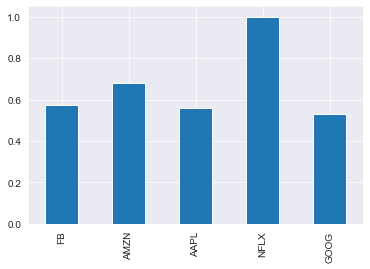

In [ ]:
# Correlation tells us how closely 2 stocks returns move together
# Correlation is a standardized value lying between -1 and 1
# When this value is greater that .5 we say that these stocks are strongly correlated
# Of course each stocks price is perfectly correlated with itself

# We focus on the correlation of returns because investors care about returns 

# Merge all stock price data into 1 dataframe
faang_list = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
mult_df = merge_df_by_column_name('daily_return',  '2020-1-1', '2020-12-31', *faang_list)
mult_df

# Generate a Correlation Matrix
mult_df.corr()

# We can look at the correlation between Netflix and the others
mult_df.corr()['NFLX']

# We can plot this in a bar chart
mult_df.corr()['NFLX'].plot(kind='bar')


In [ ]:
# Remember variance is a measure of how spread out a data set is
# Get Netflix variance
mult_df['NFLX'].var()

# Annualize by getting the number of samples and multiply
days = len(mult_df.index) # 253

nflx_a_var = mult_df['NFLX'].var() * 253
nflx_a_var


0.21491968473001707

In [ ]:
mult_df.cov() * 253


,FB,AMZN,AAPL,NFLX,GOOG
FB,0.211914,0.121061,0.165246,0.122477,0.141992
AMZN,0.121061,0.148898,0.125891,0.121325,0.100775
AAPL,0.165246,0.125891,0.218948,0.121110,0.135150
NFLX,0.122477,0.121325,0.121110,0.214920,0.094129
GOOG,0.141992,0.100775,0.135150,0.094129,0.147557


In [ ]:
# Let's create a portfolio made up of Facebook & Newmont Corporation
port_list = ["FB", "NEM"]
port_df = merge_df_by_column_name('daily_return',  '2020-1-1', '2020-12-31', *port_list)
port_df

# Generate a Correlation Matrix to see that they are not correlated
port_df.corr()

# Get prices at the beginning of Jan 2020 to calculate weight of both stocks
price_df = merge_df_by_column_name('Adj Close',  '2020-1-1', '2020-12-31', *["FB","NEM"])
price_df.head()

# I'll buy 1 share of FB at 209.78 & 5 of NEM for 41.74 for a total of 208.70
# Total Value = $418.48
fb_wt = 209.78 / 418.48
nem_wt = 208.70 / 418.48
fb_wt = .5012 # .5012
nem_wt = .4988 # .4987 and we'll change it to .4988 so they equal 1
wts = np.array([fb_wt, nem_wt])

# The portfolio variance is found from matrix multiplication
# We transpose the weights, multiply by the covarience and then the weight to get 
# the covariance of the portfolio
wts.T
port_var = np.dot(wts.T, np.dot(port_df.cov() * 253, wts))
print("Portfolio Var :", port_var)
print("FB Var :", port_df["FB"].var() * 253)
print("NEM Var :", port_df["NEM"].var() * 253)

Portfolio Var : 0.12789550370491493
FB Var : 0.21191414190946992
NEM Var : 0.2141473844065436


In [ ]:
#4 

In [ ]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join


In [ ]:
# Define path to files
# For MacOS
PATH = "/Users/mihailzac/Desktop/Python/Projects/Python for finance/Stock_list/"
# For Windows
# PATH = "D:/Python for Finance/Stocks/"

# Start date defaults
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = "2017-01-03"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = "2021-08-19"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)


In [ ]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
tickers.remove('.DS_Store')
tickers.sort()

In [ ]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv')
    except FileNotFoundError:
        pass
        # print("File Doesn't Exist")
    else:
        return df


In [ ]:
def save_dataframe_to_csv(df, ticker):
    df.to_csv(PATH + ticker + '.csv')


In [ ]:
def get_valid_dates(df, sdate, edate):  
    try:
        mask = (df['Date'] > sdate) & (df['Date'] <= edate) 
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['Date'])
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()
        date_leading = '-'.join(('0' if len(x)<2 else '')+x for x in sm_date.split('-'))
        date_ending = '-'.join(('0' if len(x)<2 else '')+x for x in last_date.split('-'))
    except Exception:
        print("Date Corrupted")
    else:
        return date_leading, date_ending


In [ ]:
def roi_between_dates(df, sdate, edate):
    try: 
        start_val = df.loc[sdate,'Adj Close'] 
        end_val = df.loc[edate,'Adj Close']
        roi = ((end_val - start_val) / start_val)
    except Exception:
        print("Data Corrupted")
    else:
        return roi


In [ ]:
def get_mean_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].mean()


In [ ]:
def get_sd_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].std()


In [ ]:
def get_cov_between_dates(df, sdate, edate):
    mean = get_mean_between_dates(df, sdate, edate)
    sd = get_sd_between_dates(df, sdate, edate)
    return sd / mean


In [ ]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        df['Date'] = pd.to_datetime(df['Date'])
        # Use a mask to grab data between defined dates
        mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df


In [ ]:
# For Mac
sec_df = pd.read_csv('/Users/mihailzac/Desktop/Python/Projects/Python for finance/stock_sectors.csv')
sec_df

# Get Industrials DF
indus_df = sec_df.loc[sec_df['Sector'] == "Industrials"]
health_df = sec_df.loc[sec_df['Sector'] == "Health Care"]
it_df = sec_df.loc[sec_df['Sector'] == "Information Technology"]
comm_df = sec_df.loc[sec_df['Sector'] == "Communication Services"]
staple_df = sec_df.loc[sec_df['Sector'] == "Consumer Staples"]
discretion_df = sec_df.loc[sec_df['Sector'] == "Consumer Discretionary"]
utility_df = sec_df.loc[sec_df['Sector'] == "Utilities"]
financial_df = sec_df.loc[sec_df['Sector'] == "Financials"]
material_df = sec_df.loc[sec_df['Sector'] == "Materials"]
restate_df = sec_df.loc[sec_df['Sector'] == "Real Estate"]
energy_df = sec_df.loc[sec_df['Sector'] == "Energy"]


In [ ]:
def get_rois_for_stocks(stock_df):
    # Will hold all tickers & stock rois
    tickers = []
    rois = []

    # iterrows provides the index and column for each row in the DF
    for index, row in stock_df.iterrows():
        df = get_df_from_csv(row['Symbol'])
    
        # If we can't find the ticker delete it from the dataframe
        if df is None:
            pass
            # print(row['Symbol'], " is not available")
        else:
            tickers.append(row['Symbol'])
            sdate, edate = get_valid_dates(df, '2020-01-01', '2022-05-07')
            df = df.set_index(['Date'])
            roi = roi_between_dates(df, sdate, edate)
            rois.append(roi)
    return pd.DataFrame({'Ticker':tickers, 'ROI':rois})

In [ ]:
industrial = get_rois_for_stocks(indus_df)
health_care = get_rois_for_stocks(health_df)
it = get_rois_for_stocks(it_df)
commun = get_rois_for_stocks(comm_df)
staple = get_rois_for_stocks(staple_df)
discretion = get_rois_for_stocks(discretion_df)
utility = get_rois_for_stocks(utility_df)
finance = get_rois_for_stocks(financial_df)
material = get_rois_for_stocks(material_df)
restate = get_rois_for_stocks(restate_df)
energy = get_rois_for_stocks(energy_df)


In [ ]:
industrial.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
44,PWR,1.882325
24,GNRC,1.369277
40,ODFL,1.201195
13,DE,1.195030
59,URI,0.751912


In [ ]:
health_care.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
40,MCK,1.459935
27,LLY,1.335126
59,WST,1.030190
5,ABC,0.937631
1,ABBV,0.923309


In [ ]:
it.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
21,ENPH,4.654056
47,NVDA,2.120597
44,MPWR,1.501385
26,FTNT,1.428610
9,ANET,1.168425


In [ ]:
commun.sort_values(by=['ROI'], ascending=False).head(20)


,Ticker,ROI
2,GOOG,0.691715
1,GOOGL,0.691359
19,TMUS,0.613437
13,IPG,0.584288
22,TWTR,0.541796
0,ATVI,0.350371
14,LYV,0.286827
16,NWSA,0.209204
17,NWS,0.165133
9,EA,0.078111


In [ ]:
staple.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
0,ADM,1.071504
17,KR,0.967091
9,COST,0.797862
27,HSY,0.644270
16,KHC,0.482808


In [ ]:
discretion.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
52,TSLA,9.059615
54,TSCO,1.215674
17,ETSY,0.911485
43,POOL,0.867224
51,TGT,0.855540


In [ ]:
utility.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
16,EXC,0.571108
11,DUK,0.350444
25,SO,0.309940
2,AEE,0.291737
4,AWK,0.282136


In [ ]:
finance.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
51,SIVB,0.941794
38,MS,0.841130
6,AJG,0.781062
47,RJF,0.682186
4,AMP,0.659520


In [ ]:
material.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
1,ALB,2.429637
23,MOS,2.055850
11,FCX,1.903726
18,NUE,1.621029
5,CF,1.296901


In [ ]:
restate.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
14,IRM,1.059418
11,EXR,0.845468
18,PSA,0.701129
17,PLD,0.668431
16,MAA,0.530794


In [ ]:
energy.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
3,DVN,2.003646
10,MRO,1.116197
16,PXD,0.926399
19,WMB,0.806226
8,HES,0.794997


In [ ]:
port_list = ["PWR", "MCK", "ENPH", "GOOG", "COST", "ADM", "TSLA", "EXC", 
             "SIVB", "ALB", "IRM"]


In [ ]:
mult_df = merge_df_by_column_name('daily_return',  '2020-01-01', 
                                  '2022-05-07', *port_list)
mult_df

# Generate a Correlation Matrix
mult_df.corr()


,PWR,MCK,ENPH,GOOG,COST,ADM,TSLA,EXC,SIVB,ALB,IRM
PWR,1.000000,0.424523,0.381920,0.432522,0.350588,0.608300,0.270017,0.510363,0.606696,0.540727,0.465419
MCK,0.424523,1.000000,0.207625,0.472552,0.473028,0.575962,0.192674,0.625439,0.483249,0.413811,0.425494
ENPH,0.381920,0.207625,1.000000,0.396040,0.317772,0.272931,0.473817,0.331487,0.353716,0.405674,0.234302
GOOG,0.432522,0.472552,0.396040,1.000000,0.556856,0.441733,0.427685,0.528636,0.523826,0.405745,0.394887
COST,0.350588,0.473028,0.317772,0.556856,1.000000,0.418167,0.310474,0.519549,0.367530,0.319055,0.401386
ADM,0.608300,0.575962,0.272931,0.441733,0.418167,1.000000,0.220267,0.636579,0.598426,0.494379,0.522632
TSLA,0.270017,0.192674,0.473817,0.427685,0.310474,0.220267,1.000000,0.279365,0.321805,0.335871,0.234645
EXC,0.510363,0.625439,0.331487,0.528636,0.519549,0.636579,0.279365,1.000000,0.527863,0.425799,0.556036
SIVB,0.606696,0.483249,0.353716,0.523826,0.367530,0.598426,0.321805,0.527863,1.000000,0.595368,0.451985
ALB,0.540727,0.413811,0.405674,0.405745,0.319055,0.494379,0.335871,0.425799,0.595368,1.000000,0.438965


In [ ]:
# Get the number of samples
days = len(mult_df.index)
days


592

In [ ]:
def get_stock_price_on_date(ticker, date):
    df = get_df_from_csv(ticker)
    df = df.set_index(['Date'])
    return df.loc[date,'Adj Close']


In [ ]:
# 01-04-2021 is the 1st date in 2021
print("PWR $", get_stock_price_on_date('PWR', '2022-05-05')) # 2 449.12
print("MCK $", get_stock_price_on_date('MCK', '2022-05-05')) # 1 357.74
print("ENPH $", get_stock_price_on_date('ENPH', '2022-05-05')) # 4 369.2
print("GOOG $", get_stock_price_on_date('GOOG', '2022-05-05')) # 1 522.86
print("COST $", get_stock_price_on_date('COST', '2022-05-05')) # 1 377.88
print("ADM $", get_stock_price_on_date('ADM', '2022-05-05')) # 3 527.46
print("TSLA $", get_stock_price_on_date('TSLA', '2022-05-05')) # 18 410.76
print("EXC $", get_stock_price_on_date('EXC', '2022-05-05')) # 1 435.40
print("SIVB $", get_stock_price_on_date('SIVB', '2022-05-05')) # 7 434.49
print("ALB $", get_stock_price_on_date('ALB', '2022-05-05')) # 2 548.84
print("IRM $", get_stock_price_on_date('IRM', '2022-05-05')) # 9 472.23

# Total Investment
tot_inv = 120.98999786376952 + 315.2300109863281 + 181.13999938964844 + 2334.929931640625 + 517.3200073242188+ 89.41000366210938 +46.900001525878906+ 513.3699951171875 + 54.58000183105469 + 2334.929931640625 + 873.280029296875
tot_inv


PWR $ 120.98999786376952
MCK $ 315.2300109863281
ENPH $ 181.13999938964844
GOOG $ 2334.929931640625
COST $ 517.3200073242188
ADM $ 89.41000366210938
TSLA $ 873.280029296875
EXC $ 46.900001525878906
SIVB $ 513.3699951171875
ALB $ 236.5
IRM $ 54.58000183105469


7382.07991027832

In [ ]:
def get_port_weight(price, total):
    return price / total


In [ ]:
gnrc_w = get_port_weight(120.98999786376952, 7382.07991027832)
dxcm_w = get_port_weight(315.2300109863281, 7382.07991027832)
amd_w = get_port_weight(181.13999938964844, 7382.07991027832)
nflx_w = get_port_weight(2334.929931640625, 7382.07991027832)
cost_w = get_port_weight(517.3200073242188, 7382.07991027832)
tgt_w = get_port_weight(89.41000366210938, 7382.07991027832)
aes_w = get_port_weight(873.280029296875, 7382.07991027832)
msci_w = get_port_weight(46.900001525878906, 7382.07991027832)
nem_w = get_port_weight(513.3699951171875, 7382.07991027832)
sbac_w = get_port_weight(236.5, 7382.07991027832)
hes_w = get_port_weight(54.58000183105469, 7382.07991027832)

wts = np.array([gnrc_w, dxcm_w, amd_w, nflx_w, cost_w, tgt_w, aes_w, msci_w, \
                nem_w, sbac_w, hes_w])
wts

port_var = np.dot(wts.T, np.dot(mult_df.cov() * 756, wts))
print("Portfolio Covariance :", port_var)
print("GNRC Var :", mult_df["PWR"].var() * 756)
print("NFLX Var :", mult_df["GOOG"].var() * 756)

Portfolio Covariance : 0.1598272619739747
GNRC Var : 0.5165068704750804
NFLX Var : 0.3212850474302237


In [ ]:
# Diversifiable Risk = Portfolio Variance - All Weighted Variances
def calc_diversifiable_risk(df, tickers, weights):
    # Gets number of days
    days = len(mult_df.index)
    # Calculate covariance of portfolio
    port_covar = np.dot(weights.T, np.dot(df.cov() * days, weights)) 
    
    i = 0
    while i < len(tickers):
        wt_sq = weights[i] ** 2
        stk_var = mult_df[tickers[i]].var() * days
        wt_var = wt_sq * stk_var
        port_covar = port_covar - wt_var
        i += 1
    return port_covar


In [ ]:
div_risk = calc_diversifiable_risk(mult_df, port_list, wts)
div_risk


0.07567173187151906

In [ ]:
print("Systematic Risk :", (port_var - div_risk))


Systematic Risk : 0.08415553010245565


In [ ]:
#4

In [ ]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

In [ ]:
#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns


In [ ]:
# Define path to files
# For MacOS
PATH = "/Users/mihailzac/Desktop/Python/Projects/Python for finance/Stock_list/"
# For Windows
# PATH = "D:/Python for Finance/Stocks/"

# Start date defaults
S_YEAR = 2020
S_MONTH = 1
S_DAY = 1
S_DATE_STR = "2020-01-01"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2022
E_MONTH = 5
E_DAY = 7
E_DATE_STR = "2022-05-06"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)


In [ ]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col='Date', 
                         parse_dates=True)
    except FileNotFoundError:
        pass
        # print("File Doesn't Exist")
    else:
        return df


<AxesSubplot:xlabel='eval', ylabel='beauty'>

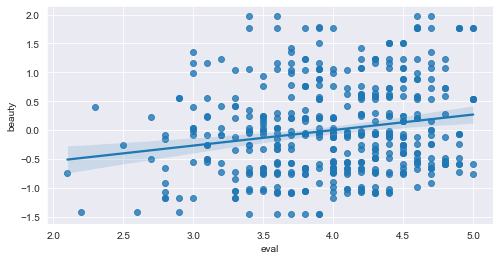

In [ ]:
# This is a dataset that evaluates beauty & teacher evaluations
beauty = sm.datasets.get_rdataset("TeachingRatings", "AER")

# We are plotting a scatter plot with a regression line that
# estimates the mean of the results.
plt.figure(figsize=(8,4))
sns.regplot(x="eval", y="beauty", data=beauty.data)

# This data is rather inconclusive


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

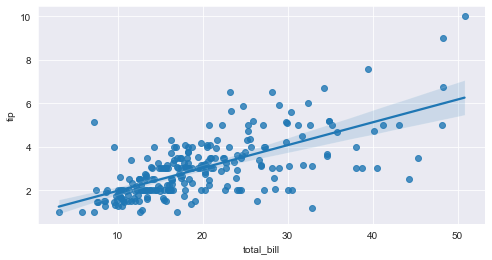

In [ ]:
# This time will we analyze whether the total bill effects
# the tip people leave at restaurants
# Load tip dataset
tips = sns.load_dataset("tips")
# Get column data in dataset
tips.columns

y = tips['total_bill']
x1 = tips['tip']

# Define the intercept to the y line
x = sm.add_constant(x1)

# OLS Ordinary Least Squares : Estimates the data so a line can 
# be drawn through data points
results = sm.OLS(y,x).fit()
results.summary()

plt.figure(figsize=(8,4))
sns.regplot(x="total_bill", y="tip", data=tips)

# Here it is clear that are guess that bill amounts effect tips
# seems to be true

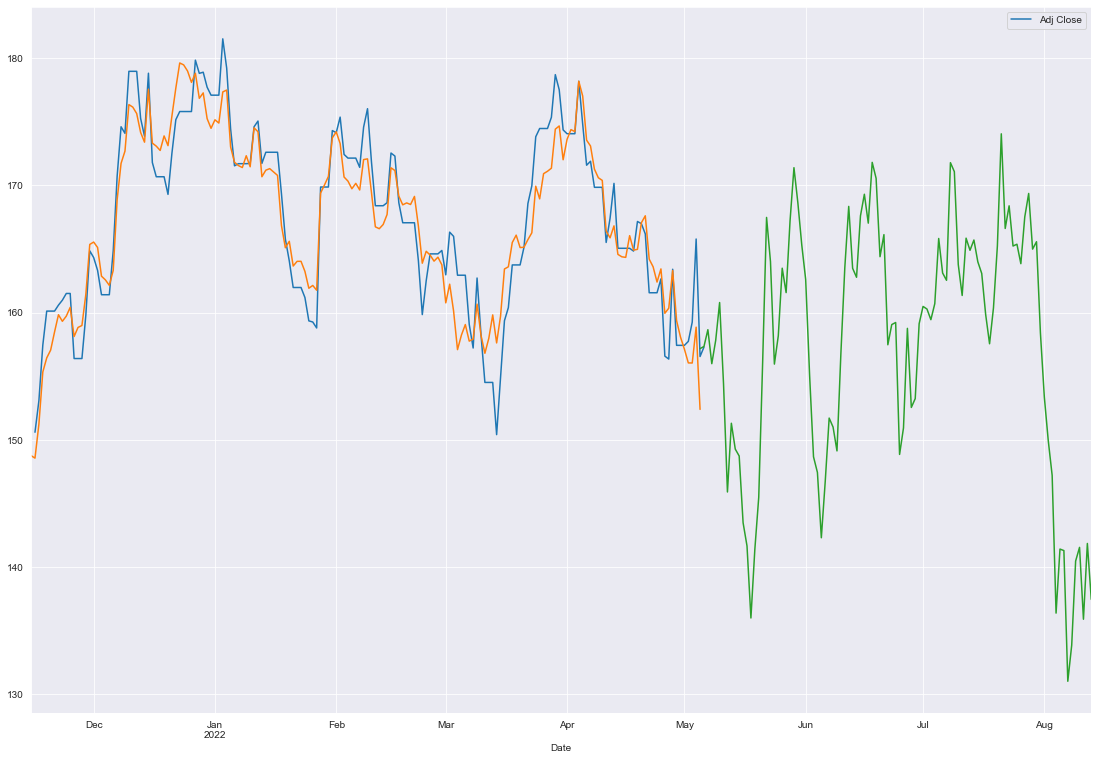

In [ ]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

a_df = get_df_from_csv("AAPL") 

a_df = a_df.asfreq('d') # Change frequency to day
a_df.index # Check frequency
a_df = a_df.fillna(method='ffill') # Fill missing values

# Delete unnamed column
a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed',case = False)],
          axis = 1, inplace = True)

# Delete daily return column
a_df = a_df.drop(['daily_return'], axis=1)

a_df

# Set style for seaborn plot
sns.set_style('darkgrid')
# Add automatic datetime converters
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(19, 13))

# Set fig and ax
fig, ax = plt.subplots()
# ax = a_df.plot(ax=ax)

# Figure out optimum lags which will be 1 or 2 for this data set
# lags = ar_select_order(a_df, maxlag=30)

# Create our model using whole data set
model = AutoReg(a_df['Adj Close'], lags.ar_lags)
model_fit = model.fit()

# Define training and testing area
len(a_df) #856 observations
train_df = a_df.iloc[50:684] # 80% minus 1st 50
test_df = a_df.iloc[684:] # Last 20%

# Define training model for 500 days (Play with Number & Test)
# and White's covariance estimator
train_model = AutoReg(a_df['Adj Close'], 400).fit(cov_type="HC0")

# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end, dynamic=True)

# Plot testing data with prediction
ax = test_df.plot(ax=ax) # Orange
ax = prediction.plot(ax=ax) # Green

# Predict 100 days into the future
forecast = train_model.predict(start=end, end=end+100, dynamic=True)
ax = forecast.plot(ax=ax) # Green


In [ ]:
#6 

In [ ]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
# Used for calculating regressions
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [ ]:
# Define path to files
# For MacOS
PATH = "/Users/mihailzac/Desktop/Python/Projects/Python for finance/Stock_list/"
# For Windows
# PATH = "D:/Python for Finance/Stocks/"

# Start date defaults
S_YEAR = 2020
S_MONTH = 1
S_DAY = 1
S_DATE_STR = "2020-01-01"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2022
E_MONTH = 5
E_DAY = 7
E_DATE_STR = "2022-05-06"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

In [ ]:
stocks_not_downloaded = []
missing_stocks = []


In [ ]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
# tickers.remove('.DS_Store')
# 2886 total stocks
tickers.sort()
len(tickers)


2911

In [ ]:
# Function that gets a dataframe by providing a ticker and starting date
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Defines the time periods to use
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    
    try:
        print("Get Data for : ", ticker)
        # Reads data into a dataframe
        df = web.DataReader(ticker, 'yahoo', start, end)['Adj Close']
    
        # Wait 10 seconds
        time.sleep(5)
    
        # Save data to a CSV file Windows
        # df.to_csv('D:/Python for Finance/Update/' + ticker + '.csv')
        
        # Save data to a CSV file Mac
        df.to_csv('/Users/mihailzac/Desktop/Python/Projects/Python for finance/Update/' + ticker + '.csv')
    except Exception as ex:
        stocks_not_downloaded.append(ticker)
        print("Couldn't Get Data for :", ticker)


In [ ]:
# # Update the stocks (new dates etc)

# for x in range(1501, 2886):
#   save_to_csv_from_yahoo(tickers[x], 2022, 5, 7, 2022, 5, 8)
# print("Finished")
# # stocks_not_downloaded

# # for x in missing_stocks:
# #   save_to_csv_from_yahoo(x, 2021, 8, 20, 2021, 9, 10)
# # print("Finished")
# # stocks_not_downloaded


In [ ]:
def get_df_from_csv(folder, ticker):
    try:
        df = pd.read_csv(folder + ticker + '.csv', index_col='Date', 
                         parse_dates=True)
    except FileNotFoundError:
        pass
        print("File Doesn't Exist")
    else:
        return df


In [ ]:
def update_stock_data(ticker):
    # For Windows 
    # up_folder = 'D:/Python for Finance/Update/'
    # For MacOS
    up_folder = '/Users/mihailzac/Desktop/Python/Projects/Python for finance/Update/'

    # For Windows 
    # stock_folder = PATH
    # For MacOS
    stock_folder = PATH

    update_df = get_df_from_csv(up_folder, ticker)
    update_df

    # Get original dataframe
    orig_df = get_df_from_csv(stock_folder, ticker)

    # Drop the unnamed column
    orig_df.drop(orig_df.columns[orig_df.columns.str.contains('unnamed',case = False)],
          axis = 1, inplace = True)

    # Drop the daily_return column
    orig_df = orig_df.drop('daily_return', 1)

    join_df = pd.concat([orig_df, update_df])
    return join_df


In [ ]:
def save_dataframe_to_csv(df, folder, ticker):
    df.to_csv(folder + ticker + '.csv')


In [ ]:
def update_stocks(stock_folder):
    
    for x in tickers:
        try:
            print("Working on :", x)
            new_df = update_stock_data(x)
            save_dataframe_to_csv(new_df, stock_folder, x)
        except Exception as ex:
            print(ex)


In [ ]:
# For MacOS
# update_stocks(PATH)


In [ ]:
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price OR (EP / BP) - 1

# Shift provides the value from the previous day
# NaN is displayed because there was no previous day price for the 1st calculation
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    # Save data to a CSV file
    # For Windows
    df.to_csv(PATH + ticker + '.csv')
    # For MacOS
    # df.to_csv(PATH + ticker + '.csv')
    return df  


In [ ]:
for x in tickers:
    try:
        print("Working on :", x)
        new_df = get_df_from_csv(PATH, x)
        new_df = add_daily_return_to_df(new_df, x)
        save_dataframe_to_csv(new_df, PATH, x)
    except Exception as ex:
        print(ex)


Working on : .DS_Store
File Doesn't Exist
'NoneType' object is not subscriptable
Working on : A
Working on : AA
Working on : AAL
Working on : AAME
Working on : AAN
Working on : AAOI
Working on : AAON
Working on : AAP
Working on : AAPL
Working on : AAT
Working on : AAWW
Working on : ABBV
Working on : ABC
Working on : ABCB
Working on : ABEO
Working on : ABG
Working on : ABIO
Working on : ABM
Working on : ABMD
Working on : ABR
Working on : ABT
Working on : ABTX
Working on : AC
Working on : ACA
Working on : ACAD
Working on : ACBI
Working on : ACC
Working on : ACCO
Working on : ACER
Working on : ACGL
Working on : ACHC
Working on : ACHV
Working on : ACIW
Working on : ACLS
Working on : ACM
Working on : ACMR
Working on : ACN
Working on : ACNB
Working on : ACOR
Working on : ACRE
Working on : ACRS
Working on : ACRX
Working on : ACTG
Working on : ACU
Working on : ADBE
Working on : ADC
Working on : ADES
Working on : ADI
Working on : ADM
Working on : ADMA
Working on : ADMP
Working on : ADNT
Working

In [ ]:
def calc_projected_roi(ticker):
    a_df = get_df_from_csv(PATH, ticker) 

    a_df = a_df.asfreq('d') # Change frequency to day
    a_df.index # Check frequency
    a_df = a_df.fillna(method='ffill') # Fill missing values

    # Delete unnamed column
    a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed',case = False)],
          axis = 1, inplace = True)

    # Delete daily return column
    a_df = a_df.drop(['daily_return'], axis=1)
    
    # Figure out optimum lags which will be 1 or 2 for this data set
    lags = ar_select_order(a_df, maxlag=30)

    # Create our model using whole data set
    model = AutoReg(a_df['Adj Close'], lags.ar_lags)
    model_fit = model.fit()

    # Define training and testing area
    print("Length :",len(a_df)) # 
    train_df = a_df.iloc[50:684] # 80% minus 1st 50
    test_df = a_df.iloc[684:] # Last 20%

    # Define training model for 500 days (Play with Number & Test)
    # and White's covariance estimator
    train_model = AutoReg(a_df['Adj Close'], 400).fit(cov_type="HC0")

    # Define start and end for prediction 
    start = len(train_df)
    end = len(train_df) + len(test_df) - 1

    prediction = train_model.predict(start=start, end=end, dynamic=True)

    # Predict 160 days into the future
    forecast = train_model.predict(start=end, end=end+60, dynamic=True)

    # Get starting price of prediction
    s_price = forecast.head(1).iloc[0]

    # Get the last price of prediction
    e_price = forecast.iloc[-1]

    # Get return over prediction
    return (e_price - s_price) / s_price


In [ ]:
def get_proj_rois():
    # Will hold all tickers & stock rois
    ticker = []
    roi = []
    
    for x in tickers:
        print("Working on :", x)
        try:
            the_roi = calc_projected_roi(x)
        except Exception as ex:
            print("Stock Data Corrupted")
        else:
            ticker.append(x)
            print("ROI :", the_roi)
            roi.append(the_roi)
        
    return pd.DataFrame({'Ticker':ticker, 'ROI':roi})


In [ ]:
proj_roi_df = get_proj_rois()
proj_roi_df


Working on : .DS_Store
File Doesn't Exist
Stock Data Corrupted
Working on : A
Length : 856
ROI : -0.1666833028733874
Working on : AA
Length : 856
ROI : -0.5254968807903598
Working on : AAL
Length : 856
ROI : 0.15792622310252963
Working on : AAME
Length : 856
ROI : -0.041028270499926786
Working on : AAN
Length : 528
Stock Data Corrupted
Working on : AAOI
Length : 856
ROI : 0.08522353069117852
Working on : AAON
Length : 856
ROI : 0.14915387486789092
Working on : AAP
Length : 856
ROI : -0.003989905090185433
Working on : AAPL
Length : 856
ROI : -0.10411197610901153
Working on : AAT
Length : 856
ROI : 0.06655746445844749
Working on : AAWW
Length : 856
ROI : -0.13142505889244774
Working on : ABBV
Length : 856
ROI : 0.07653736648035264
Working on : ABC
Length : 856
ROI : 0.09979052085921856
Working on : ABCB
Length : 856
ROI : -0.06724367505887058
Working on : ABEO
Length : 856
ROI : -0.06268070623025497
Working on : ABG
Length : 856
ROI : 0.16863468338108986
Working on : ABIO
Length : 856
RO

,Ticker,ROI
0,A,-0.166683
1,AA,-0.525497
2,AAL,0.157926
3,AAME,-0.041028
4,AAOI,0.085224
...,...,...
2882,ZUO,-0.194626
2883,ZVO,-0.009504
2884,ZYNE,-0.552044
2885,ZYXI,-0.987247


In [ ]:
proj_roi_df.sort_values(by=['ROI'], ascending=False)[0:20]


,Ticker,ROI
221,ARNA,270346.124166
1846,NURO,38.123921
2184,RHE,16.277564
2301,SESN,13.828558
123,ALLK,8.227955
380,BLFS,4.367174
503,CDZI,3.822031
719,CYTR,3.821022
736,DCPH,3.764021
59,AEHR,2.701745


In [ ]:
#7

In [ ]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
# Used for calculating regressions
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [ ]:
# Define path to files
# For MacOS
PATH = "/Users/mihailzac/Desktop/Python/Projects/Python for finance/Stock_list/"
# For Windows
# PATH = "D:/Python for Finance/Stocks/"

# Start date defaults
S_YEAR = 2020
S_MONTH = 1
S_DAY = 1
S_DATE_STR = "2020-01-01"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2022
E_MONTH = 5
E_DAY = 7
E_DATE_STR = "2022-05-06"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)
risk_free_rate = 0.0125 # Approximate 10 year bond rate


In [ ]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
# tickers.remove('.DS_Store')
# 2886 total stocks
tickers.sort()
len(tickers)


2911

In [ ]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col='Date', 
                         parse_dates=True)
    except FileNotFoundError:
        pass
        # print("File Doesn't Exist")
    else:
        return df


In [ ]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df


In [ ]:
port_list = ["PWR", "MCK", "ENPH", "GOOG", "COST", "ADM", "TSLA", "EXC", 
             "SIVB", "ALB", "IRM"]



In [ ]:
mult_df = merge_df_by_column_name('Adj Close',  '2020-01-01', 
                                  '2022-05-06', *port_list)
mult_df

# Generate a Correlation Matrix
mult_df.corr()

,PWR,MCK,ENPH,GOOG,COST,ADM,TSLA,EXC,SIVB,ALB,IRM
PWR,1.000000,0.866396,0.871176,0.946780,0.910655,0.919465,0.931169,0.854347,0.932493,0.939914,0.937979
MCK,0.866396,1.000000,0.668893,0.780590,0.919538,0.963993,0.810345,0.959554,0.722605,0.776154,0.894767
ENPH,0.871176,0.668893,1.000000,0.840221,0.758542,0.721185,0.929368,0.640669,0.875294,0.895667,0.748131
GOOG,0.946780,0.780590,0.840221,1.000000,0.877771,0.828507,0.886341,0.798528,0.962221,0.960489,0.932378
COST,0.910655,0.919538,0.758542,0.877771,1.000000,0.896587,0.881663,0.919051,0.810145,0.886062,0.914926
ADM,0.919465,0.963993,0.721185,0.828507,0.896587,1.000000,0.835481,0.930520,0.791350,0.802691,0.925025
TSLA,0.931169,0.810345,0.929368,0.886341,0.881663,0.835481,1.000000,0.773798,0.910075,0.935495,0.837531
EXC,0.854347,0.959554,0.640669,0.798528,0.919051,0.930520,0.773798,1.000000,0.736044,0.792456,0.912092
SIVB,0.932493,0.722605,0.875294,0.962221,0.810145,0.791350,0.910075,0.736044,1.000000,0.955857,0.875143
ALB,0.939914,0.776154,0.895667,0.960489,0.886062,0.802691,0.935495,0.792456,0.955857,1.000000,0.890920


<AxesSubplot:xlabel='Date'>

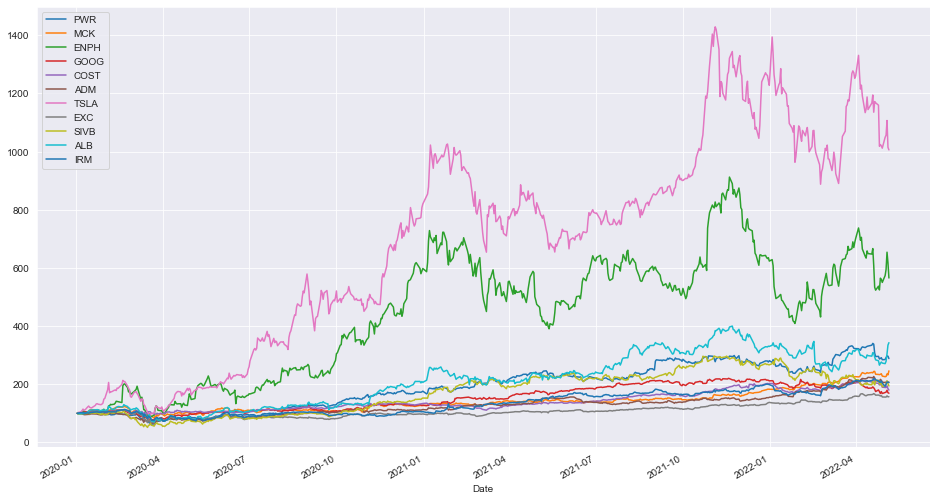

In [ ]:
(mult_df / mult_df.iloc[0] * 100).plot(figsize=(16, 9))


In [ ]:
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252 # 252 average trading days per year
mean_ret


PWR     0.451382
MCK     0.383814
ENPH    0.738677
GOOG    0.224175
COST    0.250123
ADM     0.310534
TSLA    0.984347
EXC     0.192638
SIVB    0.282962
ALB     0.525514
IRM     0.308038
dtype: float64

In [ ]:
returns.cov() * 252


,PWR,MCK,ENPH,GOOG,COST,ADM,TSLA,EXC,SIVB,ALB,IRM
PWR,0.171065,0.060756,0.138446,0.059469,0.036957,0.079417,0.084760,0.075025,0.136341,0.123617,0.073441
MCK,0.060756,0.116165,0.063314,0.053286,0.040196,0.061492,0.051013,0.074311,0.089107,0.077902,0.055161
ENPH,0.138446,0.063314,0.721466,0.112941,0.070199,0.076109,0.302404,0.102601,0.165703,0.191319,0.079564
GOOG,0.059469,0.053286,0.112941,0.107254,0.045967,0.045606,0.106059,0.061791,0.093607,0.074777,0.049639
COST,0.036957,0.040196,0.070199,0.045967,0.062557,0.032968,0.058724,0.045711,0.049892,0.044185,0.038106
ADM,0.079417,0.061492,0.076109,0.045606,0.032968,0.098358,0.053198,0.070082,0.100877,0.085621,0.062102
TSLA,0.084760,0.051013,0.302404,0.106059,0.058724,0.053198,0.541881,0.076219,0.131056,0.139680,0.068961
EXC,0.075025,0.074311,0.102601,0.061791,0.045711,0.070082,0.076219,0.123029,0.100310,0.082214,0.074836
SIVB,0.136341,0.089107,0.165703,0.093607,0.049892,0.100877,0.131056,0.100310,0.288975,0.176702,0.092722
ALB,0.123617,0.077902,0.191319,0.074777,0.044185,0.085621,0.139680,0.082214,0.176702,0.303850,0.092325


In [ ]:
returns.corr()


,PWR,MCK,ENPH,GOOG,COST,ADM,TSLA,EXC,SIVB,ALB,IRM
PWR,1.000000,0.430992,0.394086,0.439037,0.357252,0.612252,0.278394,0.517157,0.613219,0.542212,0.472191
MCK,0.430992,1.000000,0.218702,0.477388,0.471530,0.575279,0.203325,0.621605,0.486347,0.414651,0.430384
ENPH,0.394086,0.218702,1.000000,0.406012,0.330435,0.285710,0.483646,0.344382,0.362903,0.408621,0.249096
GOOG,0.439037,0.477388,0.406012,1.000000,0.561183,0.444033,0.439936,0.537917,0.531706,0.414219,0.403063
COST,0.357252,0.471530,0.330435,0.561183,1.000000,0.420285,0.318952,0.521054,0.371073,0.320485,0.405143
ADM,0.612252,0.575279,0.285710,0.444033,0.420285,1.000000,0.230430,0.637085,0.598357,0.495277,0.526578
TSLA,0.278394,0.203325,0.483646,0.439936,0.318952,0.230430,1.000000,0.295195,0.331189,0.344234,0.249120
EXC,0.517157,0.621605,0.344382,0.537917,0.521054,0.637085,0.295195,1.000000,0.531997,0.425222,0.567373
SIVB,0.613219,0.486347,0.362903,0.531706,0.371073,0.598357,0.331189,0.531997,1.000000,0.596322,0.458681
ALB,0.542212,0.414651,0.408621,0.414219,0.320485,0.495277,0.344234,0.425222,0.596322,1.000000,0.445400


In [ ]:
# Generate 11 random values that sum to 1
weights = np.random.random(11)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [0.1388744  0.00710265 0.11267456 0.13590356 0.01804405 0.09098577
 0.11314442 0.15207693 0.08826652 0.08785895 0.05506819]
Total Weight : 1.0


In [ ]:
# Provide return of portfolio using random weights over the whole dataset
np.sum(weights * returns.mean()) * 252


0.44065440831829344

In [ ]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))


0.34176484452876493

In [ ]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list
risk_free_rate = 0.0125 # Approximate 10 year bond rate


for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(11)
    p_weights /= np.sum(p_weights)
    
    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)
    
    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)
    
# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt


(array([0.45222011, 0.41167525, 0.42642282, ..., 0.3725617 , 0.41558887,
        0.44398501]),
 array([0.36122723, 0.33402868, 0.32822174, ..., 0.27949648, 0.32991893,
        0.33353904]),
 array([1.21729503, 1.19503286, 1.26110728, ..., 1.2882513 , 1.22178158,
        1.29365669]),
 array([[0.15504077, 0.00934351, 0.14606885, ..., 0.12016664, 0.16039984,
         0.06766878],
        [0.09660721, 0.09102799, 0.13168121, ..., 0.14775172, 0.15183461,
         0.05007982],
        [0.11067109, 0.04090916, 0.11621471, ..., 0.13653041, 0.05420566,
         0.12536979],
        ...,
        [0.17888161, 0.08567404, 0.02851825, ..., 0.01331688, 0.0100171 ,
         0.19753513],
        [0.17646042, 0.02304263, 0.03763959, ..., 0.17489923, 0.11151801,
         0.07192979],
        [0.07874841, 0.02586391, 0.06777566, ..., 0.12048249, 0.02862713,
         0.09774205]]))

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

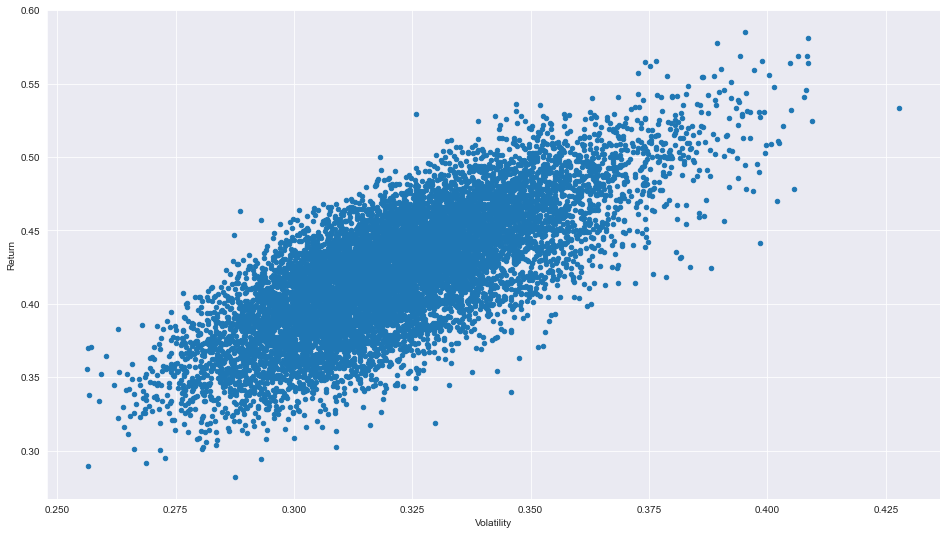

In [ ]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))


In [ ]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < 11:
    print("Stock : %s : %2.2f" % (port_list[i], (p_wt[4296][i] * 100)))
    i += 1
    
# Find volatility of that portfolio
print("\nVolatility :", p_vol[4296])
      
# Find return of that portfolio
print("Return :", p_ret[4296])

Stock : PWR : 14.80
Stock : MCK : 11.29
Stock : ENPH : 1.80
Stock : GOOG : 8.61
Stock : COST : 3.48
Stock : ADM : 10.39
Stock : TSLA : 14.34
Stock : EXC : 10.54
Stock : SIVB : 13.09
Stock : ALB : 5.04
Stock : IRM : 6.61

Volatility : 0.3165105002856515
Return : 0.4290967457980292


In [ ]:
#8

In [ ]:
def get_port_shares(one_price, force_one, wts, prices):
    # Gets number of stocks to analyze
    num_stocks = len(wts)
    
    # Holds the number of shares for each
    shares = []
    
    # Holds Cost of shares for each
    cost_shares = []
    
    i = 0
    while i < num_stocks:
        # Get max amount to spend on stock 
        max_price = one_price * wts[i]
        
        # Gets number of shares to buy and adds them to list
        num_shares = int(max_price / prices[i])
        
        # If the user wants to force buying one share do it
        if(force_one & (num_shares == 0)):
            num_shares = 1
        
        shares.append(num_shares)
        
        # Gets cost of those shares and appends to list
        cost = num_shares * prices[i]
        cost_shares.append(cost)
        i += 1
        
    return shares, cost_shares


In [ ]:
def get_port_weighting(share_cost):
    
    # Holds weights for stocks
    stock_wts = []
    # All values summed
    tot_val = sum(share_cost)
    print("Total Investment :", tot_val)
    
    for x in share_cost:
        stock_wts.append(x / tot_val)
    return stock_wts


In [ ]:
def get_port_val_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Adj Close',  date, 
                                  date, *port_list)
    # Convert from dataframe to Python list
    port_prices = port_df_start.values.tolist()
    # Trick that converts a list of lists into a single list
    port_prices = sum(port_prices, [])
    return port_prices


In [ ]:
port_list = ["PWR", "MCK", "ENPH", "GOOG", "COST", "ADM", "TSLA", "EXC", 
             "SIVB", "ALB", "IRM"]
port_wts = [2, 11, 10, 9, 8, 13, 8, 3, 9, 15, 11]

# Get all stock prices on the starting date
port_df_start = merge_df_by_column_name('Adj Close',  '2020-01-02', 
                                  '2020-01-02', *port_list)
# Convert from dataframe to Python list
port_prices = port_df_start.values.tolist()
# Trick that converts a list of lists into a single list
port_prices = sum(port_prices, [])

# Calculated Weighting
# Stock : PWR : 2.16
# Stock : MCK : 11.08
# Stock : ENPH : 9.81
# Stock : GOOG : 9.13
# Stock : COST : 8.37
# Stock : ADM : 12.73
# Stock : TSLA : 7.95
# Stock : EXC : 3.18
# Stock : SIVB : 9.05
# Stock : ALB : 15.30
# Stock : IRM : 11.26

tot_shares, share_cost = get_port_shares(118.20, True, port_wts, port_prices)
print("Shares :", tot_shares)
print("Share Cost :", share_cost)

# Get list of weights for stocks
stock_wts = get_port_weighting(share_cost)
print("Stock Weights :", stock_wts)

# Get value at end of year
get_port_val_by_date('2022-05-06', tot_shares, port_list)


Shares : [5, 9, 40, 1, 3, 35, 10, 11, 4, 25, 49]
Share Cost : [203.98460388183594, 1221.9469299316406, 1173.6000061035156, 1367.3699951171875, 839.930969238281, 1516.0720825195312, 860.52001953125, 329.4871654510498, 1017.0800170898436, 1767.0236587524414, 1290.5395374298096]
Total Investment : 11587.554985046387
Stock Weights : [0.017603765776738566, 0.10545338783794768, 0.1012810733254801, 0.11800332312396908, 0.07248560807885726, 0.13083623633078814, 0.07426243246670602, 0.028434571907209882, 0.08777347925445655, 0.1524932275214889, 0.1113728943763578]


[40.79692077636719,
 135.77188110351562,
 29.34000015258789,
 1367.3699951171875,
 279.9769897460937,
 43.31634521484375,
 86.052001953125,
 29.953378677368164,
 254.2700042724609,
 70.68094635009766,
 26.337541580200195]

In [ ]:
#9 

In [ ]:
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
# Used for calculating regressions
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [ ]:
# Define path to files
# For MacOS
PATH = "/Users/mihailzac/Desktop/Python/Projects/Python for finance/Stock_list/"
# For Windows
# PATH = "D:/Python for Finance/Stocks/"

# Start date defaults
S_YEAR = 2020
S_MONTH = 1
S_DAY = 1
S_DATE_STR = "2020-01-01"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2022
E_MONTH = 5
E_DAY = 7
E_DATE_STR = "2022-05-06"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)
risk_free_rate = 0.0125 # Approximate 10 year bond rate

In [ ]:
def save_dataframe_to_csv(df, ticker):
    df.to_csv(PATH + ticker + '.csv')


In [ ]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col='Date', 
                         parse_dates=True)
    except FileNotFoundError:
        pass
        print("File Doesn't Exist")
    else:
        return df


In [ ]:
# Shift provides the value from the previous day
# NaN is displayed because there was no previous day price for the 1st calculation
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    # Save data to a CSV file
    save_dataframe_to_csv(df, ticker)
    return df  

In [ ]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        
        # NEW Check if your dataframe has duplicate indexes
        if not df.index.is_unique:
            # Delete duplicates 
            df = df.loc[~df.index.duplicated(), :]
        
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df


In [ ]:
port_list = ["PWR", "GOOG"]
mult_df = merge_df_by_column_name('daily_return',  '2020-01-02', 
                                  '2022-05-06', *port_list)
mult_df


,PWR,GOOG
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.005597,-0.004907
2020-01-06,0.000245,0.024657
2020-01-07,-0.004649,-0.000624
2020-01-08,-0.001967,0.007880
...,...,...
2022-05-02,0.002156,0.019053
2022-05-03,0.023918,0.008301
2022-05-04,0.019074,0.037632


In [ ]:
def find_beta(ticker):
    # Tickers analyzed being the S&P and the stock passed
    port_list =['^GSPC']
    port_list.append(ticker)

    mult_df = merge_df_by_column_name('daily_return',  '2020-01-02', 
                                  '2022-05-06', *port_list)
    
    # Provides the covariance between the securities
    cov = mult_df.cov() * 252
    
    # Get the covariance of the stock and the market
    cov_vs_market = cov.iloc[0,1]
    
    # Get annualized variance of the S&P
    sp_var = mult_df['^GSPC'].var() * 252
    
    # Beta is normally calculated over a 5 year period which is why you may see a difference
    beta = cov_vs_market / sp_var
    return beta


In [ ]:
# Will hold S&P 500 adjusted close data
sp_df = pd.DataFrame()

# Download data from Yahoo
sp_df = web.DataReader('^GSPC', 'yahoo', '2020-1-2', '2022-5-6')['Adj Close']

amd_df = get_df_from_csv('PWR')

# amd_df
sp_df

Date
2020-01-02    3257.850098
2020-01-03    3234.850098
2020-01-06    3246.280029
2020-01-07    3237.179932
2020-01-08    3253.050049
                 ...     
2022-05-02    4155.379883
2022-05-03    4175.479980
2022-05-04    4300.169922
2022-05-05    4146.870117
2022-05-06    4123.339844
Name: Adj Close, Length: 592, dtype: float64

In [ ]:
sp_df = get_df_from_csv('^GSPC')['Adj Close']
sp_df


Date
2020-01-02    313.744507
2020-01-03    311.368744
2020-01-06    312.556641
2020-01-07    311.677765
2020-01-08    313.338898
                 ...    
2022-05-02    414.480011
2022-05-03    416.380005
2022-05-04    429.059998
2022-05-05    413.809998
2022-05-06    411.339996
Name: Adj Close, Length: 592, dtype: float64

In [ ]:
# Save S&P to csv
save_dataframe_to_csv(sp_df, '^GSPC')

# Get dataframe from csv
sp_df2 = get_df_from_csv('^GSPC')

# Add daily return to dataframe
add_daily_return_to_df(sp_df2, '^GSPC')
sp_df2

,Adj Close,daily_return
Date,,
2020-01-02,313.744507,NaN
2020-01-03,311.368744,-0.007572
2020-01-06,312.556641,0.003815
2020-01-07,311.677765,-0.002812
2020-01-08,313.338898,0.005330
...,...,...
2022-05-02,414.480011,0.006019
2022-05-03,416.380005,0.004584
2022-05-04,429.059998,0.030453


In [ ]:
def find_beta(ticker):
    # Tickers analyzed being the S&P and the stock passed
    port_list =['^GSPC']
    port_list.append(ticker)

    mult_df = merge_df_by_column_name('daily_return',  '2018-01-02', 
                                  '2021-09-10', *port_list)
    
    # Provides the covariance between the securities
    cov = mult_df.cov() * 252
    
    # Get the covariance of the stock and the market
    cov_vs_market = cov.iloc[0,1]
    
    # Get annualized variance of the S&P
    sp_var = mult_df['^GSPC'].var() * 252
    
    # Beta is normally calculated over a 5 year period which is why you may see a difference
    beta = cov_vs_market / sp_var
    return beta


In [ ]:
print("PWR Beta :", find_beta('PWR'))


PWR Beta : 1.0791673338618246


In [ ]:
risk_free_rate = 0.013
ri = risk_free_rate + find_beta('PWR') * 0.05
ri

0.06695836669309123

In [ ]:
# We can find the Sharpe ratio for AMD
amd_sharpe = (ri - risk_free_rate) / (mult_df['PWR'].std() * 252 ** 0.5)
amd_sharpe

0.1300413205885642

In [ ]:
def get_prices_on_date(stocks_df, date):
    return stocks_df.loc[pd.DatetimeIndex([date])]['Adj Close'].item()


In [ ]:
def get_port_val_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Adj Close',  date, 
                                  date, *port_list)
    # Convert from dataframe to Python list
    port_prices = port_prices.values.tolist()
    # Trick that converts a list of lists into a single list
    port_prices = sum(port_prices, [])
    
    # Create a list of values by multiplying shares by price
    value_list = []
    for price, share in zip(port_prices, shares):
        value_list.append(price * share)
    
    return sum(value_list)


In [ ]:
port_list = ["PWR", "MCK", "ENPH", "GOOG", "COST", "ADM", "TSLA", "EXC", 
             "SIVB", "ALB", "IRM"]
port_shares = [5, 9, 40, 1, 3, 35, 10, 11, 4, 25, 49]

# Portfolio value at start of 2020
port_val_start = get_port_val_by_date('2020-01-02', port_shares, port_list)
print("Portfolio Value at Start of 2020 : $%2.2f" % (port_val_start))

# Portfolio value at 2022-05-06
port_val_end = get_port_val_by_date('2022-05-06', port_shares, port_list)
print("Portfolio value at 2022-05-06 : $%2.2f" % (port_val_end))


Portfolio Value at Start of 2020 : $11587.55
Portfolio value at 2022-05-06 : $37060.42


In [ ]:
# Rate of return for portfolio
roi_port = (port_val_end - port_val_start) / port_val_end
print("Portfolio ROI at 2022-05-06 : %2.2f %%" % (roi_port * 100))

# S&P ROI
sp_df = get_df_from_csv('^GSPC')
sp_val_start = get_prices_on_date(sp_df, '2020-01-02')
sp_val_end = get_prices_on_date(sp_df, '2022-05-06')
sp_roi = (sp_val_end - sp_val_start) / sp_val_end
print("S&P ROI at 2022-05-06 : %2.2f %%" % (sp_roi * 100))


Portfolio ROI at 2022-05-06 : 68.73 %
S&P ROI at 2022-05-06 : 23.73 %


In [ ]:
def get_port_daily_return(sdate, edate, shares, tickers):
    # Merge all daily prices for all stocks into 1 dataframe
    mult_df = merge_df_by_column_name('Adj Close',  sdate, 
                                  edate, *port_list)
    
    # Get the number of stocks in portfolio
    num_cols = len(mult_df.columns)
    
    # Multiply each stock column by the number of shares
    i = 0
    while i < num_cols:
        mult_df[tickers[i]] = mult_df[tickers[i]].apply(lambda x: x * shares[i])
        i += 1
        
    # Create a new column with the sums of all stocks named Total
    mult_df['Total'] = mult_df.iloc[:, 0:num_cols].sum(axis=1)
    
    # Add column for portfolio daily return
    mult_df['daily_return'] = (mult_df['Total'] / mult_df['Total'].shift(1)) - 1
    
    return mult_df


In [ ]:
tot_port_df = get_port_daily_return('2020-01-02', '2022-05-06', 
                                    port_shares, port_list)
tot_port_df


,PWR,MCK,ENPH,GOOG,COST,ADM,TSLA,EXC,SIVB,ALB,IRM,Total,daily_return
Date,,,,,,,,,,,,,
2020-01-02,203.984604,1221.946930,1173.600006,1367.369995,839.930969,1516.072083,860.520020,329.487165,1017.080017,1767.023659,1290.539537,11587.554985,NaN
2020-01-03,202.842827,1204.590042,1171.600037,1360.660034,840.622467,1513.112869,886.019974,330.502554,1001.320007,1741.714859,1300.300322,11553.285992,-0.002957
2020-01-06,202.892456,1217.277328,1186.399994,1394.209961,840.853088,1501.276150,903.079987,331.010185,996.960022,1739.767647,1322.792612,11636.519430,0.007204
2020-01-07,201.949234,1214.546127,1199.599991,1393.339966,839.527405,1483.192558,938.119965,331.300350,1001.599976,1762.643242,1314.729343,11680.548157,0.003784
2020-01-08,201.552086,1238.422714,1240.000000,1404.319946,849.151611,1466.752796,984.280014,333.693718,1011.119995,1732.223511,1313.456230,11774.972622,0.008084
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,581.150017,2761.199890,6733.200073,2343.139893,1586.850037,3125.849915,9029.400024,513.150017,1990.680054,4785.499954,2484.300037,35934.419910,0.012872
2022-05-03,595.050011,2770.289978,6981.199951,2362.590088,1584.240051,3141.600075,9092.500000,513.589985,2050.479980,4927.999878,2575.929985,36595.469982,0.018396
2022-05-04,606.399994,2877.840088,7677.600098,2451.500000,1633.289978,3190.250053,9526.199951,527.119980,2150.040039,5386.750031,2677.359970,38704.350182,0.057627


In [ ]:
def find_port_beta(port_df, sdate, edate):
    # Will hold data for S&P and my portfolio
    mult_df = pd.DataFrame()
    
    # Mask defining the dates worth of data that we want
    port_mask = (port_df.index >= sdate) & (port_df.index <= edate)
    
    # Get S&P Dataframe
    sp_df = get_df_from_csv('^GSPC')
    
    sp_mask = (sp_df.index >= sdate) & (sp_df.index <= edate)
    
    # Add S&P daily return to dataframe
    mult_df['^GSPC'] = sp_df.loc[sp_mask]['daily_return']
    
    # Add the portfolio daily return data
    mult_df['Portfolio'] = port_df.loc[port_mask]['daily_return']
    
    # Provides the covariance between the securities
    cov = mult_df.cov() * 252
    
    # Get the covariance of the stocks and the market
    cov_vs_market = cov.iloc[0,1]
    
    # Get annualized variance of the S&P
    sp_var = mult_df['^GSPC'].var() * 252
    
    # Beta is normally calculated over a 5 year period which is why you may see a difference
    beta = cov_vs_market / sp_var
    return beta


In [ ]:
port_beta = find_port_beta(tot_port_df, '2020-01-02', '2022-05-06')
port_beta


1.2336964040837484

In [ ]:
#portfolio outperform of the market

port_alpha = roi_port - risk_free_rate - (port_beta * (sp_roi - risk_free_rate))
print("Portfolio Alpha : %2.2f %%" % (port_alpha * 100))


Portfolio Alpha : 39.77 %


In [ ]:
#10

In [ ]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
# Used for calculating regressions
from statsmodels.tsa.ar_model import AutoReg, ar_select_order


In [ ]:
# Define path to files
# For MacOS
PATH = "/Users/mihailzac/Desktop/Python/Projects/Python for finance/Stock_list/"
# For Windows
# PATH = "D:/Python for Finance/Stocks/"

# Start date defaults
S_YEAR = 2020
S_MONTH = 1
S_DAY = 1
S_DATE_STR = "2020-01-01"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2022
E_MONTH = 5
E_DAY = 7
E_DATE_STR = "2022-05-06"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)
risk_free_rate = 0.0125 # Approximate 10 year bond rate


In [ ]:
def save_dataframe_to_csv(df, ticker):
    df.to_csv(PATH + ticker + '.csv')


In [ ]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col='Date', 
                         parse_dates=True)
    except FileNotFoundError:
        pass
        # print("File Doesn't Exist")
    else:
        return df


In [ ]:
# Shift provides the value from the previous day
# NaN is displayed because there was no previous day price for the 1st calculation
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    # Save data to a CSV file
    save_dataframe_to_csv(df, ticker)
    return df  


In [ ]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        
        # NEW Check if your dataframe has duplicate indexes
        if not df.index.is_unique:
            # Delete duplicates 
            df = df.loc[~df.index.duplicated(), :]
        
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df


In [ ]:
port_list = ["PWR", "GOOG"]
mult_df = merge_df_by_column_name('daily_return',  '2020-01-02', 
                                  '2022-05-06', *port_list)
mult_df


,PWR,GOOG
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.005597,-0.004907
2020-01-06,0.000245,0.024657
2020-01-07,-0.004649,-0.000624
2020-01-08,-0.001967,0.007880
...,...,...
2022-05-02,0.002156,0.019053
2022-05-03,0.023918,0.008301
2022-05-04,0.019074,0.037632


In [ ]:
# # Will hold S&P 500 adjusted close data
# sp_df = pd.DataFrame()

# # Download data from Yahoo
# sp_df = web.DataReader('GSPC', 'yahoo', '2017-1-3', '2021-9-10')['Adj Close']

amd_df = get_df_from_csv('GOOG')

amd_df

,Unnamed: 0,Adj Close,daily_return
Date,,,
2020-01-02,0,1367.369995,NaN
2020-01-03,1,1360.660034,-0.004907
2020-01-06,2,1394.209961,0.024657
2020-01-07,3,1393.339966,-0.000624
2020-01-08,4,1404.319946,0.007880
...,...,...,...
2022-05-02,587,2343.139893,0.019053
2022-05-03,588,2362.590088,0.008301
2022-05-04,589,2451.500000,0.037632


In [ ]:
sp_df = get_df_from_csv('^GSPC')

sp_df

,Adj Close,daily_return
Date,,
2020-01-02,313.744507,NaN
2020-01-03,311.368744,-0.007572
2020-01-06,312.556641,0.003815
2020-01-07,311.677765,-0.002812
2020-01-08,313.338898,0.005330
...,...,...
2022-05-02,414.480011,0.006019
2022-05-03,416.380005,0.004584
2022-05-04,429.059998,0.030453


In [ ]:
# # Save S&P to csv
# save_dataframe_to_csv(sp_df, 'GSPC')

# # Get dataframe from csv
# sp_df2 = get_df_from_csv('GSPC')

# # Add daily return to dataframe
# add_daily_return_to_df(sp_df2, 'GSPC')
# sp_df2


In [ ]:
def find_beta(ticker):
    # Tickers analyzed being the S&P and the stock passed
    port_list =['^GSPC']
    port_list.append(ticker)

    mult_df = merge_df_by_column_name('daily_return',  '2020-01-02', 
                                  '2022-05-06', *port_list)
    
    # Provides the covariance between the securities
    cov = mult_df.cov() * 252
    
    # Get the covariance of the stock and the market
    cov_vs_market = cov.iloc[0,1]
    
    # Get annualized variance of the S&P
    sp_var = mult_df['^GSPC'].var() * 252
    
    # Beta is normally calculated over a 5 year period which is why you may see a difference
    beta = cov_vs_market / sp_var
    return beta

In [ ]:
print("GOOGLE Beta :", find_beta('GOOG'))


GOOGLE Beta : 1.0574606434212046


In [ ]:
#Expected Return
risk_free_rate = 0.013
ri = risk_free_rate + find_beta('GOOG') * 0.05
ri


0.06587303217106023

In [ ]:
# We can find the Sharpe ratio for Google
amd_sharpe = (ri - risk_free_rate) / (mult_df['GOOG'].std() * 252 ** 0.5)
amd_sharpe


0.16156585657890712

In [ ]:
def get_prices_on_date(stocks_df, date):
    return stocks_df.loc[pd.DatetimeIndex([date])]['Adj Close'].item()


In [ ]:
def get_port_val_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Adj Close',  date, 
                                  date, *port_list)
    # Convert from dataframe to Python list
    port_prices = port_prices.values.tolist()
    # Trick that converts a list of lists into a single list
    port_prices = sum(port_prices, [])
    
    # Create a list of values by multiplying shares by price
    value_list = []
    for price, share in zip(port_prices, shares):
        value_list.append(price * share)
    
    return sum(value_list)


In [ ]:
port_list = ["PWR", "MCK", "ENPH", "GOOG", "COST", "ADM", "TSLA", "EXC", 
             "SIVB", "ALB", "IRM"]
port_shares = [5, 9, 40, 1, 3, 35, 10, 11, 4, 25, 49]

# Portfolio value at start of 2020
port_val_start = get_port_val_by_date('2020-01-02', port_shares, port_list)
print("Portfolio Value at Start of 2020 : $%2.2f" % (port_val_start))

# Portfolio value at 2022-05-06
port_val_end = get_port_val_by_date('2022-05-06', port_shares, port_list)
print("Portfolio value at 2022-05-06 : $%2.2f" % (port_val_end))

Portfolio Value at Start of 2020 : $11587.55
Portfolio value at 2022-05-06 : $37060.42


In [ ]:
# Rate of return for portfolio
roi_port = (port_val_end - port_val_start) / port_val_end
print("Portfolio ROI at 2022-05-06 : %2.2f %%" % (roi_port * 100))

# S&P ROI
sp_df = get_df_from_csv('^GSPC')
sp_val_start = get_prices_on_date(sp_df, '2020-01-02')
sp_val_end = get_prices_on_date(sp_df, '2022-05-06')
sp_roi = (sp_val_end - sp_val_start) / sp_val_end
print("S&P ROI at 2022-05-06 : %2.2f %%" % (sp_roi * 100))


Portfolio ROI at 2022-05-06 : 68.73 %
S&P ROI at 2022-05-06 : 23.73 %


In [ ]:
def get_port_daily_return(sdate, edate, shares, tickers):
    # Merge all daily prices for all stocks into 1 dataframe
    mult_df = merge_df_by_column_name('Adj Close',  sdate, 
                                  edate, *port_list)
    
    # Get the number of stocks in portfolio
    num_cols = len(mult_df.columns)
    
    # Multiply each stock column by the number of shares
    i = 0
    while i < num_cols:
        mult_df[tickers[i]] = mult_df[tickers[i]].apply(lambda x: x * shares[i])
        i += 1
        
    # Create a new column with the sums of all stocks named Total
    mult_df['Total'] = mult_df.iloc[:, 0:num_cols].sum(axis=1)
    
    # Add column for portfolio daily return
    mult_df['daily_return'] = (mult_df['Total'] / mult_df['Total'].shift(1)) - 1
    
    return mult_df


In [ ]:
tot_port_df = get_port_daily_return('2020-01-02', '2022-05-06', 
                                    port_shares, port_list)
tot_port_df


,PWR,MCK,ENPH,GOOG,COST,ADM,TSLA,EXC,SIVB,ALB,IRM,Total,daily_return
Date,,,,,,,,,,,,,
2020-01-02,203.984604,1221.946930,1173.600006,1367.369995,839.930969,1516.072083,860.520020,329.487165,1017.080017,1767.023659,1290.539537,11587.554985,NaN
2020-01-03,202.842827,1204.590042,1171.600037,1360.660034,840.622467,1513.112869,886.019974,330.502554,1001.320007,1741.714859,1300.300322,11553.285992,-0.002957
2020-01-06,202.892456,1217.277328,1186.399994,1394.209961,840.853088,1501.276150,903.079987,331.010185,996.960022,1739.767647,1322.792612,11636.519430,0.007204
2020-01-07,201.949234,1214.546127,1199.599991,1393.339966,839.527405,1483.192558,938.119965,331.300350,1001.599976,1762.643242,1314.729343,11680.548157,0.003784
2020-01-08,201.552086,1238.422714,1240.000000,1404.319946,849.151611,1466.752796,984.280014,333.693718,1011.119995,1732.223511,1313.456230,11774.972622,0.008084
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,581.150017,2761.199890,6733.200073,2343.139893,1586.850037,3125.849915,9029.400024,513.150017,1990.680054,4785.499954,2484.300037,35934.419910,0.012872
2022-05-03,595.050011,2770.289978,6981.199951,2362.590088,1584.240051,3141.600075,9092.500000,513.589985,2050.479980,4927.999878,2575.929985,36595.469982,0.018396
2022-05-04,606.399994,2877.840088,7677.600098,2451.500000,1633.289978,3190.250053,9526.199951,527.119980,2150.040039,5386.750031,2677.359970,38704.350182,0.057627


In [ ]:
def find_port_beta(port_df, sdate, edate):
    # Will hold data for S&P and my portfolio
    mult_df = pd.DataFrame()
    
    # Mask defining the dates worth of data that we want
    port_mask = (port_df.index >= sdate) & (port_df.index <= edate)
    
    # Get S&P Dataframe
    sp_df = get_df_from_csv('^GSPC')
    
    sp_mask = (sp_df.index >= sdate) & (sp_df.index <= edate)
    
    # Add S&P daily return to dataframe
    mult_df['^GSPC'] = sp_df.loc[sp_mask]['daily_return']
    
    # Add the portfolio daily return data
    mult_df['Portfolio'] = port_df.loc[port_mask]['daily_return']
    
    # Provides the covariance between the securities
    cov = mult_df.cov() * 252
    
    # Get the covariance of the stocks and the market
    cov_vs_market = cov.iloc[0,1]
    
    # Get annualized variance of the S&P
    sp_var = mult_df['^GSPC'].var() * 252
    
    # Beta is normally calculated over a 5 year period which is why you may see a difference
    beta = cov_vs_market / sp_var
    return beta


In [ ]:
#How good the portfolio is 
port_beta = find_port_beta(tot_port_df, '2020-01-02', '2022-05-06')
port_beta


1.2336964040837484

In [ ]:
#Result of the portfolio compared to the index 

port_alpha = roi_port - risk_free_rate - (port_beta * (sp_roi - risk_free_rate))
print("Portfolio Alpha : %2.2f %%" % (port_alpha * 100))


Portfolio Alpha : 39.77 %


In [ ]:
# Remember These
# port_list = ["PWR", "MCK", "ENPH", "GOOG", "COST", "ADM", "TSLA", "EXC", 
#              "SIVB", "ALB", "IRM"]
# port_shares = [5, 9, 40, 1, 3, 35, 10, 11, 4, 25, 49]

tot_port_df = get_port_daily_return('2020-01-02', '2022-05-06', 
                                    port_shares, port_list)
tot_port_df



,PWR,MCK,ENPH,GOOG,COST,ADM,TSLA,EXC,SIVB,ALB,IRM,Total,daily_return
Date,,,,,,,,,,,,,
2020-01-02,203.984604,1221.946930,1173.600006,1367.369995,839.930969,1516.072083,860.520020,329.487165,1017.080017,1767.023659,1290.539537,11587.554985,NaN
2020-01-03,202.842827,1204.590042,1171.600037,1360.660034,840.622467,1513.112869,886.019974,330.502554,1001.320007,1741.714859,1300.300322,11553.285992,-0.002957
2020-01-06,202.892456,1217.277328,1186.399994,1394.209961,840.853088,1501.276150,903.079987,331.010185,996.960022,1739.767647,1322.792612,11636.519430,0.007204
2020-01-07,201.949234,1214.546127,1199.599991,1393.339966,839.527405,1483.192558,938.119965,331.300350,1001.599976,1762.643242,1314.729343,11680.548157,0.003784
2020-01-08,201.552086,1238.422714,1240.000000,1404.319946,849.151611,1466.752796,984.280014,333.693718,1011.119995,1732.223511,1313.456230,11774.972622,0.008084
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,581.150017,2761.199890,6733.200073,2343.139893,1586.850037,3125.849915,9029.400024,513.150017,1990.680054,4785.499954,2484.300037,35934.419910,0.012872
2022-05-03,595.050011,2770.289978,6981.199951,2362.590088,1584.240051,3141.600075,9092.500000,513.589985,2050.479980,4927.999878,2575.929985,36595.469982,0.018396
2022-05-04,606.399994,2877.840088,7677.600098,2451.500000,1633.289978,3190.250053,9526.199951,527.119980,2150.040039,5386.750031,2677.359970,38704.350182,0.057627


In [ ]:
def port_chart_predict():
    tot_port_df = get_port_daily_return('2020-01-02', '2022-05-06', 
                                        port_shares, port_list)
    # Change frequency to day
    tot_port_df = tot_port_df.asfreq('d')
    tot_port_df.index

    # Delete NaNs for nontrading days
    tot_port_df = tot_port_df.fillna(method='ffill') # Fill in missing values using previous

    # # Delete all unneeded columns
    del_col = ["PWR", "MCK", "ENPH", "GOOG", "COST", "ADM", "TSLA", "EXC", 
                "SIVB", "ALB", "IRM"]


    for x in del_col:
        tot_port_df = tot_port_df.drop([x], axis=1)

    # Set style for seaborn plot
    sns.set_style('darkgrid')
    # Add automatic datetime converters
    pd.plotting.register_matplotlib_converters()
    # Default figure size
    sns.mpl.rc('figure',figsize=(19, 13))

    # Set fig and ax
    fig, ax = plt.subplots()

    # Figure out optimum lags for this data set
    # lags = ar_select_order(tot_port_df, maxlag=30)
    # print("Lags :", lags.ar_lags)

    # Create our model using whole data set
    model = AutoReg(tot_port_df['Total'], lags.ar_lags)
    model_fit = model.fit()

    # Define training and testing area
    print("Observations :", len(tot_port_df)) # 856 observations

    train_df = tot_port_df.iloc[0:685] # First 80% 
    test_df = tot_port_df.iloc[686:] # Last 20%

    # Define training model for 459 days (Play with Number & Test)
    # and White's covariance estimator
    train_model = AutoReg(tot_port_df['Total'], 400).fit(cov_type="HC0")

    # # Define start and end for prediction 
    start = len(train_df)
    end = len(train_df) + len(test_df) - 1

    prediction = train_model.predict(start=start, end=end, dynamic=True)

    # Plot testing data with prediction
    ax = test_df.plot(ax=ax) # Orange
    ax = prediction.plot(ax=ax) # Green

    # Predict 100 days into the future
    forecast = train_model.predict(start=end, end=end+60, dynamic=True)
    ax = forecast.plot(ax=ax) # Green




In [ ]:
def sp500_chart_predict(): 
    sp500_df = get_df_from_csv("^GSPC") 

    sp500_df = sp500_df.asfreq('d') # Change frequency to day
    sp500_df.index # Check frequency
    sp500_df = sp500_df.fillna(method='ffill') # Fill missing values

    # Delete unnamed column
    sp500_df.drop(sp500_df.columns[sp500_df.columns.str.contains('unnamed',case = False)],
              axis = 1, inplace = True)

    # Delete daily return column
    sp500_df = sp500_df.drop(['daily_return'], axis=1)

    sp500_df

    # Set style for seaborn plot
    sns.set_style('darkgrid')
    # Add automatic datetime converters
    pd.plotting.register_matplotlib_converters()
    # Default figure size
    sns.mpl.rc('figure',figsize=(19, 13))

    # Set fig and ax
    fig, ax = plt.subplots()
    # ax = a_df.plot(ax=ax)

    # Figure out optimum lags which will be 1 or 2 for this data set
    # lags = ar_select_order(a_df, maxlag=30)

    # Create our model using whole data set
    model = AutoReg(sp500_df['Adj Close'], lags.ar_lags)
    model_fit = model.fit()

    # Define training and testing area
    len(a_df) #856 observations
    train_df = sp500_df.iloc[1:684] # 80% minus 1st 50
    test_df = sp500_df.iloc[684:] # Last 20%

    # Define training model for 500 days (Play with Number & Test)
    # and White's covariance estimator
    train_model = AutoReg(sp500_df['Adj Close'], 420).fit(cov_type="HC0")

    # Define start and end for prediction 
    start = len(train_df)
    end = len(train_df) + len(test_df) - 1

    prediction = train_model.predict(start=start, end=end, dynamic=True)

    # Plot testing data with prediction
    ax = test_df.plot(ax=ax) # Orange
    ax = prediction.plot(ax=ax) # Green

    # Predict 100 days into the future
    forecast = train_model.predict(start=end, end=end+60, dynamic=True)
    ax = forecast.plot(ax=ax) # Green


In [ ]:
def sp500_port_chart():
    merge_df_by_column_name('Adj Close',  '2020-01-01', 
                                      '2022-05-06', '^GSPC')
    (tot_port_df / tot_port_df.iloc[0] * 100).plot(figsize=(16, 9))
    (sp500 / sp500.iloc[0] * 100).plot(figsize=(16, 9))


    # tot_port_df




Observations : 856


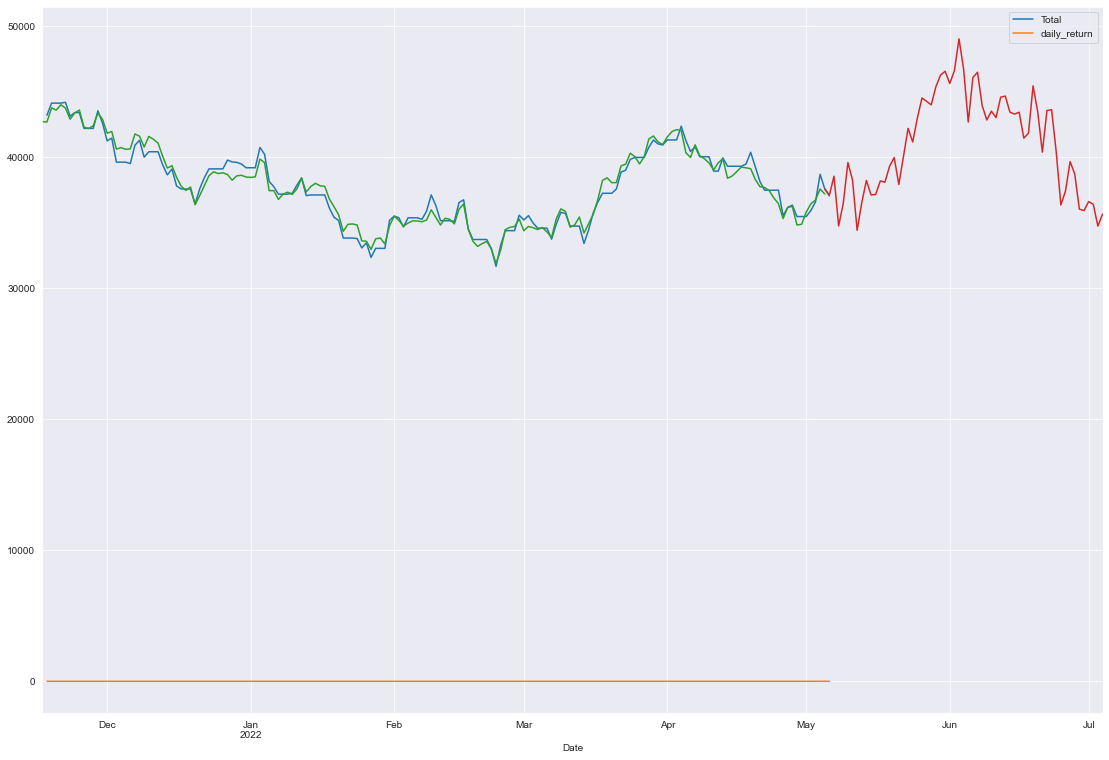

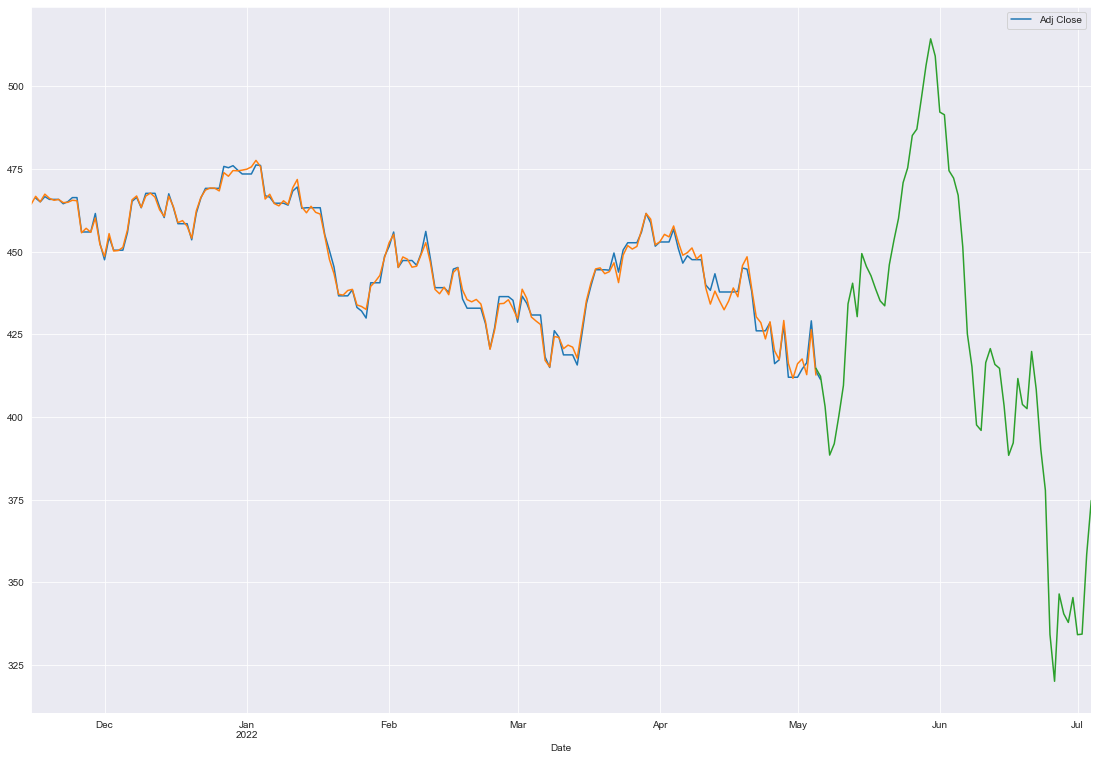

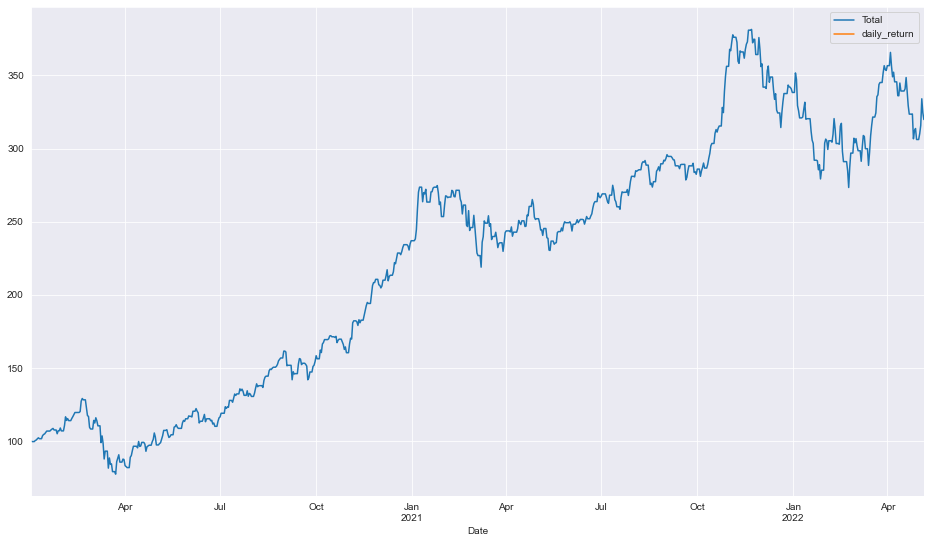

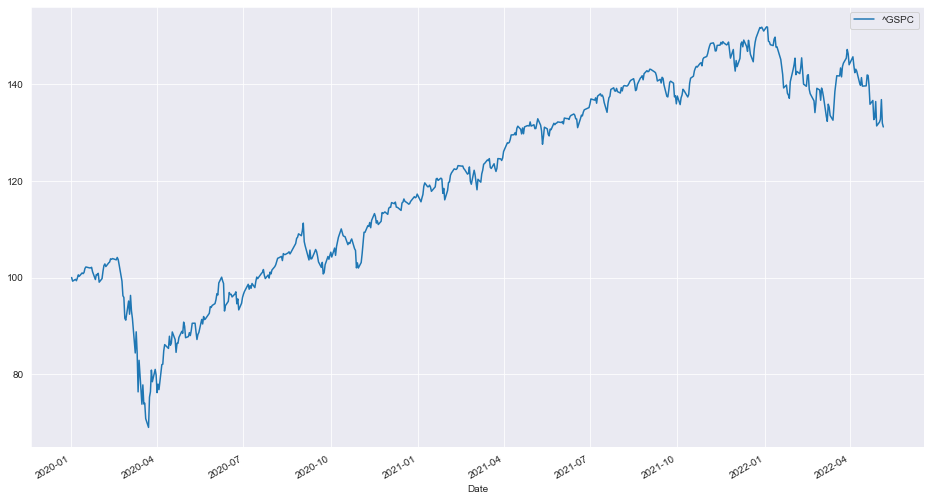

In [ ]:
port_chart_predict()
sp500_chart_predict()
sp500_port_chart()
